# Transcripts Preprocessing for Linguistic Features

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import textstat
import matplotlib.pyplot as plt
import seaborn as sns
import re

conn = sqlite3.connect("ds_edu_videos_punctuated.db")

transcripts_df = pd.read_sql_query("SELECT * FROM transcripts", conn)

def clean_transcript(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'\[.*?\]', '', text) # remove text in brackets
    text = re.sub(r'\s+', ' ', text) # remove extra whitespace
    text = re.sub(r'\n', ' ', text) # remove newlines
    return text.strip()

transcripts_df['clean_transcript'] = transcripts_df['punctuated_transcript'].apply(clean_transcript)


In [ ]:
filtered_transcripts_df = transcripts_df[~transcripts_df['type'].str.contains('auto-generated', na=False)]

In [ ]:
len(filtered_transcripts_df)

1039

### Readability

C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\3065391412.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transcripts_df['readability_fk_grade'] = filtered_transcripts_df['clean_transcript'].apply(lambda x: safe_readability(textstat.flesch_kincaid_grade, x))
C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\3065391412.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transcripts_df['readability_ari'] = filtered_transcripts_df['clean_transcript'].apply(lambda x: safe_readability(

<Figure size 1200x600 with 0 Axes>

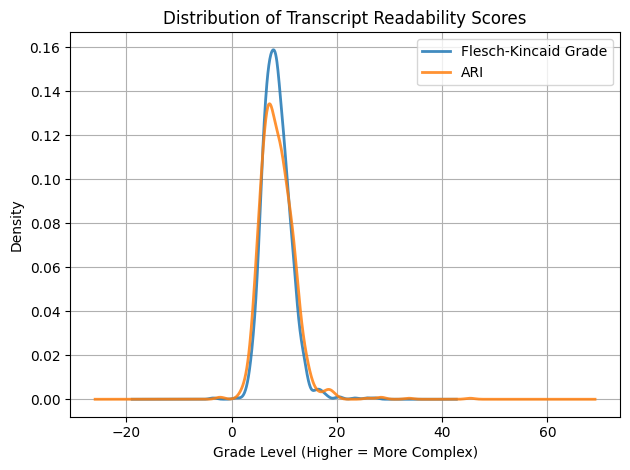

In [ ]:
# calculate readability scores
def safe_readability(fn, text):
    try:
        return fn(text) if text else np.nan
    except:
        return np.nan

filtered_transcripts_df['readability_fk_grade'] = filtered_transcripts_df['clean_transcript'].apply(lambda x: safe_readability(textstat.flesch_kincaid_grade, x))
filtered_transcripts_df['readability_ari'] = filtered_transcripts_df['clean_transcript'].apply(lambda x: safe_readability(textstat.automated_readability_index, x))

# visualize readability scores
readability_cols = ['readability_fk_grade', 'readability_ari']

plt.figure(figsize=(12, 6))
filtered_transcripts_df[readability_cols].plot(kind='density', linewidth=2, alpha=0.85)
plt.title("Distribution of Transcript Readability Scores")
plt.xlabel("Grade Level (Higher = More Complex)")
plt.grid(True)
plt.legend(["Flesch-Kincaid Grade", "ARI"])
plt.tight_layout()
plt.show()


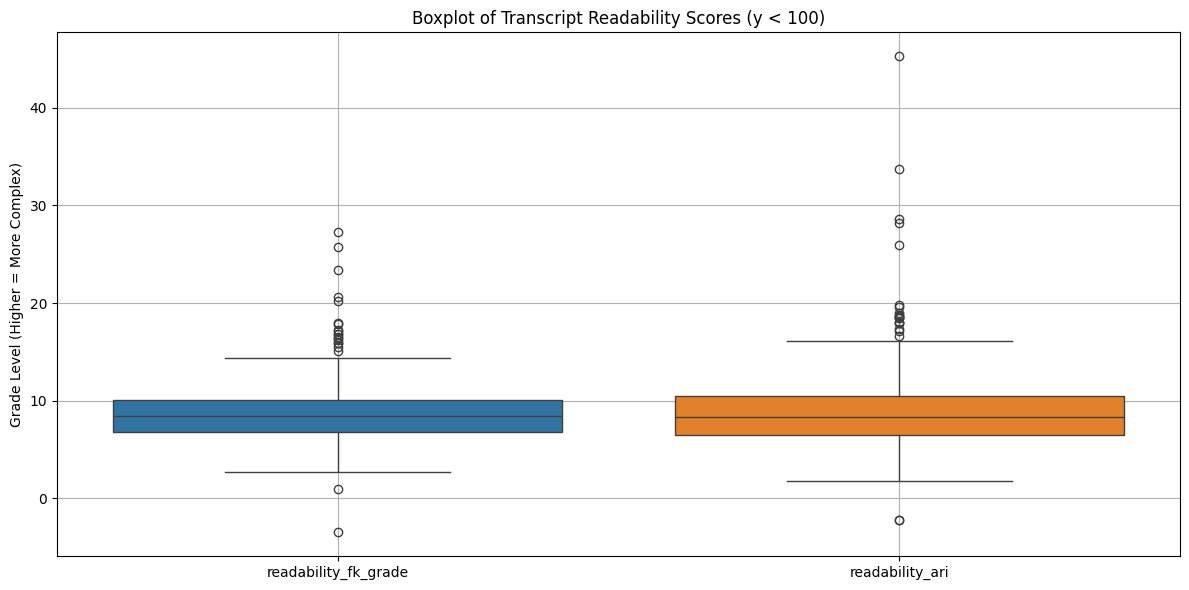

In [ ]:
# Filter data to include only rows where all readability scores are less than 200
filtered_df = filtered_transcripts_df[filtered_transcripts_df[readability_cols].max(axis=1) < 100]

# Boxplot of readability scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df[readability_cols])
plt.title("Boxplot of Transcript Readability Scores (y < 100)")
plt.ylabel("Grade Level (Higher = More Complex)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("Readability Score Summary:")
display(filtered_transcripts_df[readability_cols].describe())

Readability Score Summary:


,readability_fk_grade,readability_ari
count,1037.000000,1037.000000
mean,8.573095,8.684474
std,2.685159,3.381222
min,-3.500000,-2.200000
25%,6.800000,6.500000
50%,8.400000,8.300000
75%,10.100000,10.500000
max,27.300000,45.300000


In [ ]:
filtered_transcripts_df[readability_cols].nunique() # Check unique values in readability columns

readability_fk_grade    128
readability_ari         147
dtype: int64

#### Flesch-Kincaid Readability score in decreasing order

In [ ]:
filtered_transcripts_df.sort_values('readability_fk_grade', ascending=False).head(20)[['video_id', 'readability_fk_grade', 'clean_transcript']]

,video_id,readability_fk_grade,clean_transcript
7894,l2WEl_l5MJY,27.3,"#StoredFunction. #Function #RDBMSTutorial, #pl..."
3695,LzIOzC8qckE,25.7,"Business understanding, Data understanding, Da..."
2797,GNRPBhnNE48,23.4,UPDATE SQL STATEMENT. SQL UPDATE QUERY/STATEME...
12473,SCHEU--CgA4,20.6,Correction: 2x4=8tuples.
11908,KDo7eZrnd7Q,20.2,SQL.
7297,h7-PMFXUi7U,18.0,A data warehouse is a computer system designed...
1146,6LwRo9QVMJQ,17.9,When you look at the requirement in the PCI DS...
8316,nfxl_6xUSpM,17.2,(gentle music). Data is generated with every a...
4663,S5oJzBunZLM,17.1,Data visualization is a representation of data...
6485,c77Kz3eBH7M,16.8,"When building cloud analytics solutions, data ..."


In [ ]:
filtered_transcripts_df.sort_values('readability_fk_grade').head(15)[['video_id', 'readability_fk_grade', 'clean_transcript']]

,video_id,readability_fk_grade,clean_transcript
7469,iH6lhYtbHKk,-3.5,you.
9321,tpzabDTqO4U,0.9,"Like, Share, Subscribe."
7121,fu6xBX2u1fw,2.7,"hello guys, welcome back to my channel. you ar..."
10063,yCbankIouUU,2.9,Kindly read.
342,1Bb3KkariUA,3.0,SQL Server Management Studio состоит из 5 ключ...
8870,qwI0oe3-g9g,3.4,"Dear students, welcome to the Gate Smashers. I..."
10352,zv0ba0Iok1Y,3.5,"Hello friends, Welcome to Gate Smashers. The t..."
8943,rRAiUdmcJEs,3.5,"Hey guys, I'm Venkat and in this video we'll u..."
7295,h60vaqrXHO8,3.5,"Hello friends, welcome to Gate Smashers. In th..."
7089,fh4yBn0oTaM,3.6,"Hello friends, Welcome you to Gate Smashers. I..."


#### ARI Readability score in decreasing order

In [ ]:
filtered_transcripts_df.sort_values('readability_ari', ascending=False).head(5)[['video_id', 'readability_ari', 'clean_transcript']]


,video_id,readability_ari,clean_transcript
7894,l2WEl_l5MJY,45.3,"#StoredFunction. #Function #RDBMSTutorial, #pl..."
12473,SCHEU--CgA4,33.7,Correction: 2x4=8tuples.
3695,LzIOzC8qckE,28.6,"Business understanding, Data understanding, Da..."
2797,GNRPBhnNE48,28.2,UPDATE SQL STATEMENT. SQL UPDATE QUERY/STATEME...
11363,CzGwtIDyMLo,25.9,Hanuman Sir AP(Assistant Programmer) qualifica...


In [ ]:
filtered_transcripts_df.sort_values('readability_ari').head(5)[['video_id', 'readability_ari', 'clean_transcript']]


,video_id,readability_ari,clean_transcript
9110,sS-LJMTVVj8,1.2,"Hello friends, welcome to Gate Smashers Today'..."
8870,qwI0oe3-g9g,2.0,"Dear students, welcome to the Gate Smashers. I..."
5936,ZnQwO6V7pec,2.8,welcome back to the channel. I'm back with ver...
4394,QQqGfScdlzA,2.9,"Hello friends, welcome to Gate Smashers The to..."
6387,bSdvM_0hzgc,3.3,"Closure method, we are going to discuss closur..."


### Valence & Density

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import numpy as np

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def compute_valence_density(text):
    tokens = word_tokenize(text.lower())
    tagged = pos_tag(tokens) 
    sentiment_scores = []
    sentiment_word_count = 0

    for word, tag in tagged:
        wn_tag = get_wordnet_pos(tag)
        if wn_tag is None or word.lower() in stop_words:
            continue
        lemma = lemmatizer.lemmatize(word, pos=wn_tag)
        synsets = list(swn.senti_synsets(lemma, wn_tag))
        if not synsets:
            continue
        syn = synsets[0]
        valence = syn.pos_score() - syn.neg_score()
        sentiment_scores.append(valence)
        sentiment_word_count += 1

    valence_avg = np.mean(sentiment_scores) if sentiment_scores else 0
    density = sentiment_word_count / len(tokens) if tokens else 0
    return pd.Series({'valence': valence_avg, 'density': density})

# Apply to transcripts
filtered_transcripts_df[['valence', 'density']] = filtered_transcripts_df['clean_transcript'].apply(compute_valence_density)
print(filtered_transcripts_df[['video_id', 'valence', 'density']])


          video_id   valence   density
22     -6sA9nHlZDc  0.000456  0.313621
23     -7VOIX7YtB4  0.036946  0.415558
36     -ADurpo5VX8  0.025504  0.502818
48     -EJa_I_4-vg  0.024394  0.356620
58     -G1LOoeTzPM  0.040471  0.407346
...            ...       ...       ...
14838  WHBH0yz35_8  0.020349  0.367521
14851  njy9CIUSwuE  0.030405  0.391949
14869  o-Ld5-IFLZg  0.000000  0.250000
14874  o5G3Jdciqgs  0.055760  0.362989
14921  tkbAA--wKOc  0.035386  0.347432

[1039 rows x 3 columns]


C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\3657513352.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transcripts_df[['valence', 'density']] = filtered_transcripts_df['clean_transcript'].apply(compute_valence_density)
C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\3657513352.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_transcripts_df[['valence', 'density']] = filtered_transcripts_df['clean_transcript'].apply(compute_valence_density)


In [ ]:
print("Valence Density Summary:")
display(filtered_transcripts_df[['valence', 'density']].describe())

Valence Density Summary:


,valence,density
count,1039.000000,1039.000000
mean,0.022038,0.352432
std,0.021635,0.060184
min,-0.100000,0.000000
25%,0.010749,0.324205
50%,0.021770,0.350000
75%,0.032196,0.379741
max,0.375000,0.666667


#### Valence in decreasing order

In [ ]:
filtered_transcripts_df.sort_values('valence', ascending=False).head(10)[['video_id', 'valence', 'clean_transcript']]

,video_id,valence,clean_transcript
13384,eiLqDeDp7Oc,0.130682,Now let's see what is SELECT Statement and Whe...
3695,LzIOzC8qckE,0.097222,Business understanding Data understanding Data...
4354,QAZLYCSGokc,0.092391,dbShards does 2 basic jobs: of course we do sc...
14664,xipnW2w5EfE,0.091176,"Hey folks, I'm Rishabh. And today's video is v..."
10162,yuYKEx6VDPE,0.084862,"Hey there, data wranglers! Today, we're diving..."
1949,BKHCf16-8dU,0.084000,Finally let's talk about how we specify the se...
1515,8fzDx9PTRzw,0.083333,"So database reliability is a huge concern, esp..."
4662,S5kWMMy7r4k,0.082219,Hi and welcome to this video on relational dat...
795,4-izCxI5WRc,0.080275,Suppose there is a coaching app that supports ...
6261,af4LckivJT8,0.080263,"Hey there, future data wizards! Lets look at t..."


#### Valence in increasing order

In [ ]:
filtered_transcripts_df.sort_values('valence', ascending=True).head(10)[['video_id', 'valence', 'clean_transcript']]

,video_id,valence,clean_transcript
1800,AQX5m78HMlE,-0.100000,Error happen When Update Field Date_attendace....
3523,KrAg1QleOM0,-0.062500,Microsoft Access SQL Query.
8372,o-83E6levzM,-0.060641,"Hello everyone, in this video we're going to t..."
6850,eFV4KoW-bl8,-0.048343,greetings everyone today we will learn how to ...
9056,sB_44W5mWEI,-0.030891,GateKeeper makes it really easy to configure a...
1919,B7qGSX8IeSY,-0.030115,">> Hi, everyone. My name is Aditi Gupta and I'..."
8452,oP8yLMjmszE,-0.024329,Types of problem Which are the problems? And w...
3159,ITuHTgpnUcI,-0.024160,So what exactly is the Subquery? See you guys ...
5251,VcntXPTjRQw,-0.023946,Next how instance recovery works. This is a si...
3831,MrntM5uALZQ,-0.023438,hello YouTube welcome to my channel today I wi...


#### Density in decreasing order

In [ ]:
filtered_transcripts_df.sort_values('density', ascending=False).head(10)[['video_id', 'density', 'clean_transcript']]

,video_id,density,clean_transcript
3695,LzIOzC8qckE,0.900000,Business understanding Data understanding Data...
6850,eFV4KoW-bl8,0.560372,greetings everyone today we will learn how to ...
772,3qXD63NBpAE,0.544959,to stay on top of the digital trends and move ...
10058,y9trGgqFu_k,0.542683,- Users generate 2.5 quintillion bytes of data...
5425,WZWnB5XRi_8,0.518033,greetings everyone today we will learn to take...
7620,jMkkPAigf6g,0.516667,data mining is a powerful tool for marketers w...
7650,jUTIiO-FVO0,0.513667,"Welcome to database town, In this video, we'll..."
36,-ADurpo5VX8,0.512673,"Online transaction processing, or OLTP, is a c..."
7714,jo5OfHJvpg8,0.508906,hi guys welcome to another video in this tutor...
1481,8VcjfCFo_d8,0.506024,now we will use date add function this functio...


#### Density in increasing order

In [ ]:
filtered_transcripts_df.sort_values('density', ascending=True).head(10)[['video_id', 'density', 'clean_transcript']]

,video_id,density,clean_transcript
3736,MI1LxH5SDMg,0.013423,Нормальные формы базы данных База данных. SQL ...
342,1Bb3KkariUA,0.023810,SQL Server Management Studio состоит из 5 ключ...
14240,qx8QyD4auj8,0.083333,Correction 'A%N Eg: AMAN (only).
7894,l2WEl_l5MJY,0.111111,#StoredFunction #Function #RDBMSTutorial #plsq...
1332,7U2flvYGrOM,0.111111,Download PDF Notes-Link In Description-. Like ...
9852,x4nOi76RF6Y,0.111111,Download PDF Notes-Link In Description-. Like ...
8603,pMaRZlVPm9k,0.111111,Download PDF Notes-Link In Description-. Like ...
10068,yE0pbItBkLg,0.111111,Download PDF Notes-Link In Description-. Like ...
8868,qw4aRBQ6sk4,0.111111,Download PDF Notes-Link In Description-. Like ...
6929,em6EPsDe1fI,0.111111,Download PDF Notes-Link In Description-. Like ...


In [ ]:
df.merge(filtered_transcripts_df[['video_id', 'valence', 'density']], on='video_id', how='left') 

,video_id,video_title,en_title_x,channel_title_x,video_published_at,description_x,en_description_x,tags,audio_language,textual_language,...,like_view_ratio,comment_view_ratio,title_word_count,duration_seconds,channel_productivity,num_tags,has_captions,is_hd,valence_y,density_y
0,4YilEjkNPrQ,Lec-44: Introduction to Relational Algebra | D...,Lec-44: Introduction to Relational Algebra | D...,Gate Smashers,2018-06-23 05:21:14+00:00,👉Subscribe to our new channel:https://www.yout...,👉Subscribe to our new channel:https://www.yout...,"DBMS, Database Management System, sql, pocedur...",en,N/A,...,0.015275,0.000139,9,264.0,0.652305,18,1,1,0.039522,0.389685
1,G9ixeTIyg8s,Lec-45: Projection in Relational Algebra | Dat...,Lec-45: Projection in Relational Algebra | Dat...,Gate Smashers,2018-06-29 04:52:00+00:00,👉Subscribe to our new channel:https://www.yout...,👉Subscribe to our new channel:https://www.yout...,"relational algebra in dbms, projection in rela...",en,N/A,...,0.018783,0.000215,9,379.0,0.652305,14,1,1,0.000972,0.354779
2,2hUVf17DHVs,Lec-46: Selection in Relational Algebra | Data...,Lec-46: Selection in Relational Algebra | Data...,Gate Smashers,2018-06-30 06:30:45+00:00,👉Subscribe to our new channel:https://www.yout...,👉Subscribe to our new channel:https://www.yout...,"Selection in Relational Algebra, Relational Al...",en,N/A,...,0.020072,0.000286,9,393.0,0.652305,16,1,1,-0.002315,0.378378
3,F6MBz_h3Uj8,Lec-47: Cross/Cartesian Product in Relational...,Lec-47: Cross/Cartesian Product in Relational...,Gate Smashers,2018-07-04 04:09:20+00:00,👉Subscribe to our new channel:https://www.yout...,👉Subscribe to our new channel:https://www.yout...,"Cartesian Product in Relational Algebra, Cross...",en,N/A,...,0.018916,0.000209,10,378.0,0.652305,13,1,1,-0.000378,0.325787
4,7LRH7DY1QbQ,Converting an ER Diagram to a Relational Table...,Converting an ER Diagram to a Relational Table...,Ritu Kapur Classes,2018-01-07 12:06:06+00:00,"#ERdiagramToRelationalTable, #Database, #ERdia...","#ERdiagramToRelationalTable, #Database, #ERdia...","#ERdiagramToRelationalTable, #Database, #ERdia...",en,N/A,...,0.016862,0.000554,10,461.0,0.118179,4,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17429,I1ZNdznPoms,Leveraging Enterprise Data warehousing to the ...,Leveraging Enterprise Data warehousing to the ...,JobStack,2024-12-22 11:05:37+00:00,,,N/A,N/A,N/A,...,0.000000,0.000000,8,3455.0,0.134213,1,0,1,NaN,NaN
17430,F52KtJVAgLc,History of Data Warehouses,History of Data Warehouses,Rishi Sharma,2024-12-20 19:43:15+00:00,,,N/A,N/A,N/A,...,0.000000,0.000000,4,281.0,0.000827,1,0,1,NaN,NaN
17431,p_FwNHmN3Y4,DT based Activity on Data warehousing | Dr.T.R...,DT based Activity on Data warehousing | Dr.T.R...,Lekhaa .R,2024-12-23 15:46:10+00:00,#snsinstitutions #snsdesignthinkers #designthi...,#snsinstitutions #snsdesignthinkers #designthi...,N/A,N/A,N/A,...,0.000000,0.000000,11,380.0,0.022303,1,0,1,NaN,NaN
17432,yEfEI5Sd4rc,and duckdb pydata global 2023,and duckdb pydata global 2023,CodeMake,2024-12-22 22:33:04+00:00,Download 1M+ code from https://codegive.com/46...,Download 1M+ code from https://codegive.com/46...,"DuckDB, PyData, Global 2023, Data Analysis, In...",N/A,N/A,...,NaN,NaN,5,350.0,14.159817,14,0,1,NaN,NaN


# Data Preprocessing

In [6]:
import sqlite3
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import spearmanr, pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data from SQLite
conn = sqlite3.connect("ds_edu_videos.db")

videos_df = pd.read_sql_query("SELECT * FROM videos", conn)
channels_df = pd.read_sql_query("SELECT * FROM channels", conn)

videos_df = videos_df.rename(columns={
    'published_at': 'video_published_at',
    'view_count': 'video_view_count',
    'like_count': 'video_like_count',
    'comment_count': 'video_comment_count',
    'title': 'video_title',
})

channels_df = channels_df.rename(columns={
    'published_at': 'channel_created_at',
    'view_count': 'channel_view_count',
    'title' : 'channel_title',
    'video_count': 'channel_video_count',
})



In [7]:
df = videos_df.merge(channels_df, on='channel_id', how='left')
df = df.merge(filtered_transcripts_df, on='video_id', how='right')


In [8]:
len(df)

1039

In [9]:

# Convert date string to datetime
df['video_published_at'] = pd.to_datetime(df['video_published_at'], format='ISO8601')
df['days_since_published'] = (pd.Timestamp("2024-12-24", tz='UTC') - df['video_published_at']).dt.days

df['channel_created_at'] = pd.to_datetime(df['channel_created_at'], format='ISO8601')
df['days_since_channel_created'] = (pd.Timestamp("2024-12-24", tz='UTC') - df['channel_created_at']).dt.days

df = df.dropna(subset=['video_view_count', 'channel_view_count','duration'])

df['video_view_count'] = pd.to_numeric(df['video_view_count'], errors='coerce')
df['video_like_count'] = pd.to_numeric(df['video_like_count'], errors='coerce')
df['video_comment_count'] = pd.to_numeric(df['video_comment_count'], errors='coerce')

# # Filter out videos with very few views
# df = df[df['video_view_count'] > 100]
# # Filter out videos with very few days since published
# df = df[df['days_since_published'] >= 7]

# Calculate views per day
df['views_per_day'] = df['video_view_count'] / df['days_since_published']
df['views_per_day'] = df['views_per_day'].replace([np.inf, -np.inf], np.nan) 

# Construct Contextual Features

# # Like-View Ratio
# df['video_like_count'] = pd.to_numeric(df['video_like_count'], errors='coerce')
# df['like_view_ratio'] = df['video_like_count'] / df['video_view_count']
# df['like_view_ratio'] = df['like_view_ratio'].replace([np.inf, -np.inf], np.nan)

# # Comment-View Ratio
# df['video_comment_count'] = pd.to_numeric(df['video_comment_count'], errors='coerce')
# df['comment_view_ratio'] = df['video_comment_count'] / df['video_view_count']
# df['comment_view_ratio'] = df['comment_view_ratio'].replace([np.inf, -np.inf], np.nan)

#  Likes per Day
df['likes_per_day'] = df['video_like_count'] / df['days_since_published']
df['likes_per_day'] = df['likes_per_day'].replace([np.inf, -np.inf], np.nan)

# Comments per Day
df['comments_per_day'] = df['video_comment_count'] / df['days_since_published']
df['comments_per_day'] = df['comments_per_day'].replace([np.inf, -np.inf], np.nan)

# Title Length
df['video_title'] = df['video_title'].fillna('')
df['title_word_count'] = df['video_title'].apply(lambda x: len(x.strip().split()))

# Duration (convert HH:MM:SS to seconds)
df['duration_seconds'] = pd.to_timedelta(df['duration']).dt.total_seconds()

df['subscriber_count'] = pd.to_numeric(df['subscriber_count'])

df['channel_video_count'] = pd.to_numeric(df['channel_video_count'])

# Calculate days since the channel was created
df['channel_productivity'] = df['channel_video_count'] / df['days_since_channel_created']
df['channel_productivity'] = df['channel_productivity'].replace([np.inf, -np.inf], np.nan)

# num_tags
df['num_tags'] = df['tags'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Binary fields
df['paid_product_placement'] = df['paid_product_placement'].map({'true': 1, 'false': 0})
df['has_captions'] = df['caption_availability'].map({'true': 1, 'false': 0})
df['is_hd'] = df['definition'].map({'hd': 1, 'sd': 0})



In [186]:
# Correlation Analysis
continuous_features = ['duration_seconds', 'subscriber_count', 'channel_productivity', 'num_tags', 'channel_view_count', 'days_since_published', 'days_since_channel_created', 'title_word_count', 'valence', 'density', 'readability_fk_grade']
target_vars = ['views_per_day', 'likes_per_day', 'comments_per_day', 'engagement_index']

results = []

for target in target_vars:

    for feat in continuous_features:
        valid = df[[feat, target]].dropna()
        from scipy.stats import spearmanr
        corr, pval = spearmanr(valid[feat], valid[target])
        method = 'Spearman'
        results.append({
            'target': target,
            'feature': feat,
            'correlation': corr,
            'p_value': pval,
            'method': method
        })
        

corr_df = pd.DataFrame(results)


<Axes: xlabel='target', ylabel='feature'>

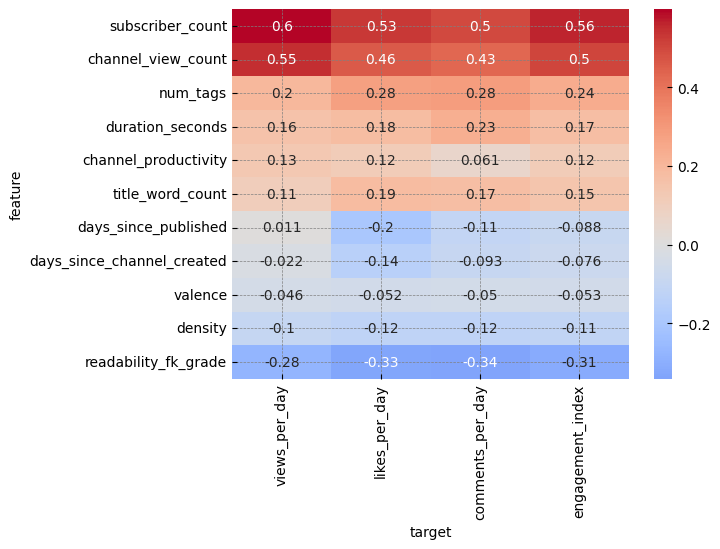

In [176]:
# Pivot table for heatmap
pivot = corr_df.pivot(index='feature', columns='target', values='correlation')
# Sort pivot table by 'views_per_day' in descending order
pivot_sorted = pivot.sort_values(by='views_per_day', ascending=False)
pivot_sorted = pivot_sorted[['views_per_day', 'likes_per_day', 'comments_per_day', 'engagement_index']]

# Plot the heatmap
sns.heatmap(pivot_sorted, annot=True, center=0, cmap='coolwarm')


In [177]:
# Create Result Table

corr_df['significance'] = corr_df['p_value'].apply(
    lambda p: '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else ''
)
display(corr_df[['target', 'feature', 'correlation', 'p_value', 'method', 'significance']])


,target,feature,correlation,p_value,method,significance
0,views_per_day,duration_seconds,0.155109,7.869759e-07,Spearman,***
1,views_per_day,subscriber_count,0.598253,1.699472e-98,Spearman,***
2,views_per_day,channel_productivity,0.132966,2.371422e-05,Spearman,***
3,views_per_day,num_tags,0.202104,1.028722e-10,Spearman,***
4,views_per_day,channel_view_count,0.549633,2.521734e-80,Spearman,***
5,views_per_day,days_since_published,0.011322,7.200995e-01,Spearman,
6,views_per_day,days_since_channel_created,-0.021613,4.939410e-01,Spearman,
7,views_per_day,title_word_count,0.106135,7.562802e-04,Spearman,***
8,views_per_day,valence,-0.045766,1.473104e-01,Spearman,
9,views_per_day,density,-0.100666,1.403916e-03,Spearman,**


# PCA

In [10]:
import scipy.stats as stats
stats.shapiro(df['views_per_day'])  # Shapiro-Wilk test for normality

ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [11]:
sample_views_per_day = df['views_per_day'].dropna().sample(500, random_state=42)
stats.shapiro(sample_views_per_day)
sample_like_view_ratio = df['likes_per_day'].dropna().sample(500, random_state=42)
stats.shapiro(sample_like_view_ratio)
sample_comment_view_ratio = df['comments_per_day'].dropna().sample(500, random_state=42)
stats.shapiro(sample_comment_view_ratio)
print('views_per_day:', stats.shapiro(sample_views_per_day))
print('likes_per_day:', stats.shapiro(sample_like_view_ratio))
print('comments_per_day:', stats.shapiro(sample_comment_view_ratio))

views_per_day: ShapiroResult(statistic=np.float64(0.28057051834945346), pvalue=np.float64(4.709935006390464e-40))
likes_per_day: ShapiroResult(statistic=np.float64(0.25318242147552317), pvalue=np.float64(1.4245789873837886e-40))
comments_per_day: ShapiroResult(statistic=np.float64(0.06791066598402096), pvalue=np.float64(1.0040861530585451e-43))


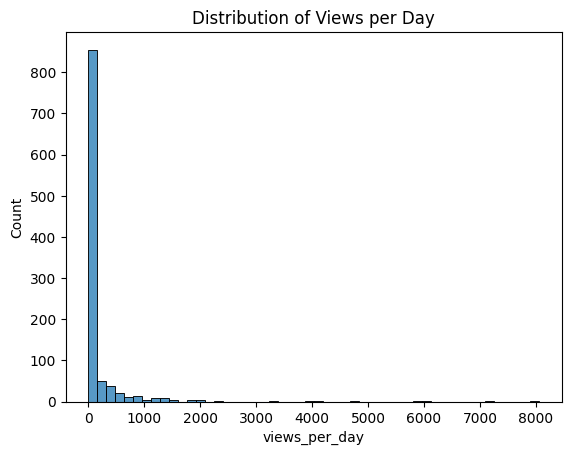

In [12]:
sns.histplot(df['views_per_day'], bins=50)
plt.title('Distribution of Views per Day')
plt.show()


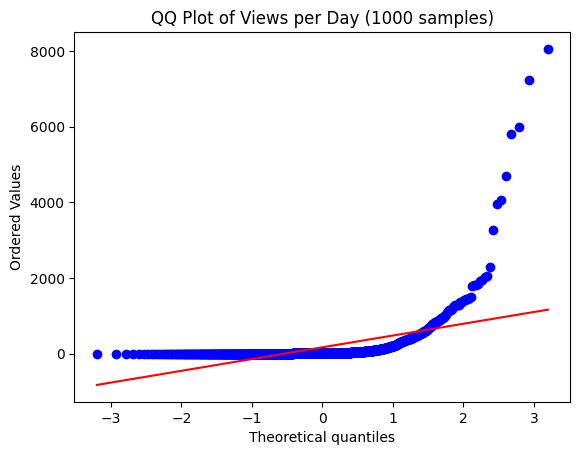

In [13]:
import scipy.stats as stats
import matplotlib.pyplot as plt

sample = df['views_per_day'].dropna().sample(1000, random_state=42)  # Sample 1000 values

stats.probplot(sample, dist="norm", plot=plt)
plt.title("QQ Plot of Views per Day (1000 samples)")
plt.show()


In [14]:
print(df[['views_per_day', 'likes_per_day', 'comments_per_day']].isna().sum())


views_per_day        2
likes_per_day       11
comments_per_day    30
dtype: int64


In [15]:
print(df[['readability_fk_grade', 'valence', 'density']].isna().sum())

readability_fk_grade    2
valence                 0
density                 0
dtype: int64


In [16]:
print(df['views_per_day'].nunique())
print(df['likes_per_day'].nunique())
print(df['comments_per_day'].nunique())


1037
994
796


In [17]:
import numpy as np
print(np.isinf(df[['views_per_day', 'likes_per_day', 'comments_per_day']]).sum())


views_per_day       0
likes_per_day       0
comments_per_day    0
dtype: int64


In [ ]:

# Replace infinite values with NaN and drop rows with NaN in key columns
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['views_per_day', 'likes_per_day', 'comments_per_day'])

from scipy.stats import spearmanr
r1_s, p1_s = spearmanr(df['views_per_day'], df['likes_per_day'])
r2_s, p2_s = spearmanr(df['views_per_day'], df['comments_per_day'])
r3_s, p3_s = spearmanr(df['likes_per_day'], df['comments_per_day'])

print(f"Spearman r (views vs likes): {r1_s:.3f}, p-value: {p1_s:.2e}")
print(f"Spearman r (views vs comments): {r2_s:.3f}, p-value: {p2_s:.2e}")
print(f"Spearman r (likes vs comments): {r3_s:.3f}, p-value: {p3_s:.2e}")



Spearman r (views vs likes): 0.933, p-value: 0.00e+00
Spearman r (views vs comments): 0.832, p-value: 3.25e-259
Spearman r (likes vs comments): 0.864, p-value: 3.93e-301


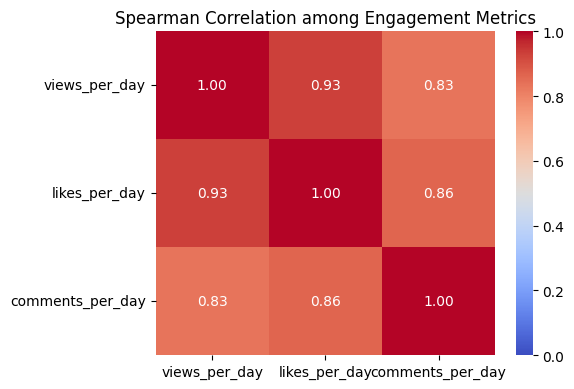

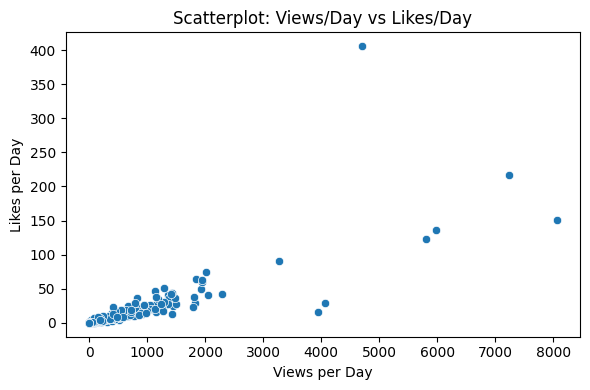

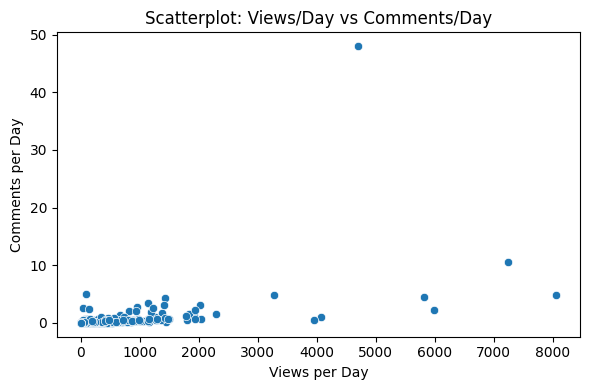

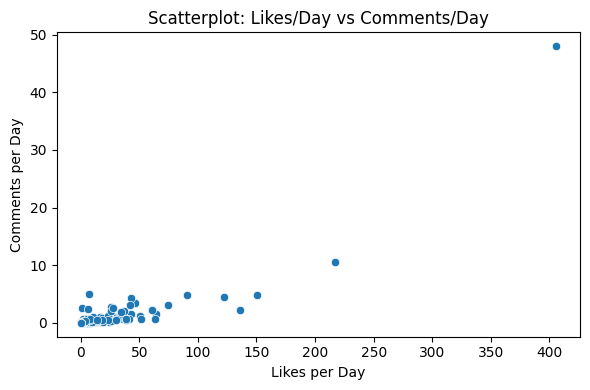

In [ ]:
# Spearman correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Engagement variable names
engagement_vars = ['views_per_day', 'likes_per_day', 'comments_per_day']

# Figure 2: Spearman correlation matrix heatmap
spearman_corr = df[engagement_vars].corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=0.0, vmax=1.0)
plt.title("Spearman Correlation among Engagement Metrics")
plt.tight_layout()
plt.show()

# Figure 3: Scatterplot of views/day vs likes/day with fit line
plt.figure(figsize=(6, 4))
sns.scatterplot(x='views_per_day', y='likes_per_day', data=df)
# sns.regplot(x='views_per_day', y='likes_per_day', data=df, scatter=False, color='red')
plt.title("Scatterplot: Views/Day vs Likes/Day")
plt.xlabel("Views per Day")
plt.ylabel("Likes per Day")
plt.tight_layout()
plt.show()

# Additional Figure 3: Scatterplot of views/day vs comments/day
plt.figure(figsize=(6, 4))
sns.scatterplot(x='views_per_day', y='comments_per_day', data=df)
# sns.regplot(x='views_per_day', y='comments_per_day', data=df, scatter=False, color='red')
plt.title("Scatterplot: Views/Day vs Comments/Day")
plt.xlabel("Views per Day")
plt.ylabel("Comments per Day")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='likes_per_day', y='comments_per_day', data=df)
# sns.regplot(x='views_per_day', y='comments_per_day', data=df, scatter=False, color='red')
plt.title("Scatterplot: Likes/Day vs Comments/Day")
plt.xlabel("Likes per Day")
plt.ylabel("Comments per Day")
plt.tight_layout()
plt.show()


In [21]:
df.columns

Index(['video_id', 'video_title', 'en_title_x', 'channel_title_x',
       'video_published_at', 'description_x', 'en_description_x', 'tags',
       'audio_language', 'textual_language', 'duration', 'definition',
       'caption_availability', 'video_view_count', 'video_like_count',
       'video_comment_count', 'paid_product_placement', 'keywords',
       'channel_id', 'channel_title_y', 'en_title_y', 'description_y',
       'en_description_y', 'channel_created_at', 'country', 'uploads_playlist',
       'channel_view_count', 'subscriber_count', 'channel_video_count',
       'transcript', 'type', 'punctuated_transcript', 'clean_transcript',
       'readability_fk_grade', 'readability_ari', 'valence', 'density',
       'days_since_published', 'days_since_channel_created', 'views_per_day',
       'likes_per_day', 'comments_per_day', 'title_word_count',
       'duration_seconds', 'channel_productivity', 'num_tags', 'has_captions',
       'is_hd'],
      dtype='object')

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[['views_per_day', 'likes_per_day', 'comments_per_day']]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=1)
engagement_index = pca.fit_transform(X_scaled)
df['engagement_index'] = engagement_index

print(f"The engagement component is able to account for {pca.explained_variance_ratio_[0]:.6f} of the total variance.")

The engagement component is able to account for 0.821710 of the total variance.


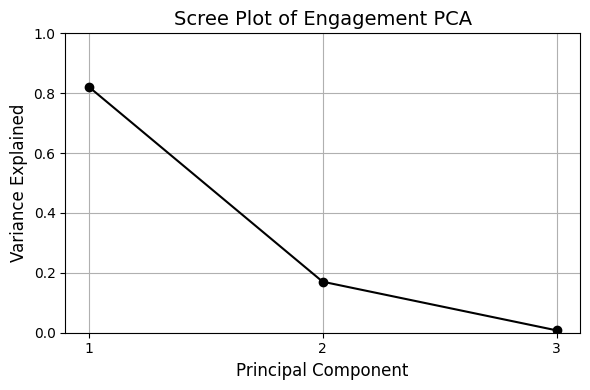

PC1 explains 0.8217 of the total variance
PC2 explains 0.1704 of the total variance
PC3 explains 0.0079 of the total variance


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select variables and standardize
X = df[['views_per_day', 'likes_per_day', 'comments_per_day']]
X_scaled = StandardScaler().fit_transform(X)

# Perform PCA, keep all principal components
pca = PCA()
pca.fit(X_scaled)

# Plot Scree Plot
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_,
         marker='o', linestyle='-', color='black')
plt.title('Scree Plot of Engagement PCA', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Variance Explained', fontsize=12)
plt.xticks([1, 2, 3], fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print explained variance ratio
for i, ratio in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"PC{i} explains {ratio:.4f} of the total variance")


In [ ]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

# Engagement-related variables
engagement_vars = ['views_per_day', 'likes_per_day', 'comments_per_day']

# Standardize
X_scaled = StandardScaler().fit_transform(df[engagement_vars])

# PCA analysis, extract all principal components
pca = PCA(n_components=3)
pca.fit(X_scaled)

# Get principal component loadings
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}_Loading' for i in range(pca.n_components_)],
                        index=engagement_vars)

# Print loadings matrix
print("Principal Component Loadings:")
print(loadings.round(4))


Principal Component Loadings:
                  PC1_Loading  PC2_Loading  PC3_Loading
views_per_day          0.5403       0.7354      -0.4091
likes_per_day          0.6322      -0.0339       0.7741
comments_per_day       0.5554      -0.6768      -0.4832


In [26]:
df['engagement_index']

0       0.749015
1      -0.345301
2      -0.360561
3      -0.359370
4      -0.345612
          ...   
1034    0.070342
1035   -0.360335
1036   -0.362943
1037   -0.360597
1038    1.217875
Name: engagement_index, Length: 1004, dtype: float64

# Interval Variables Statistical Analysis

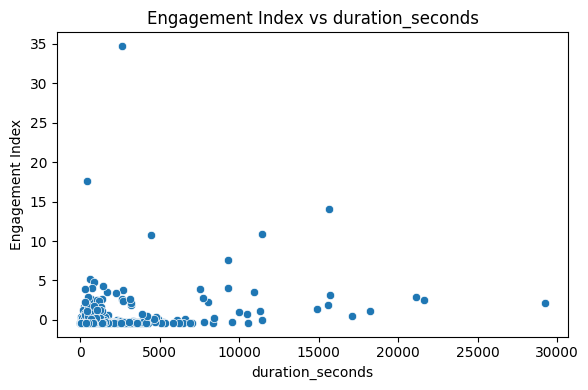

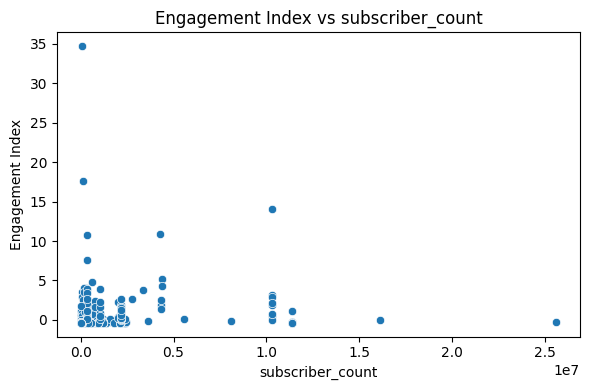

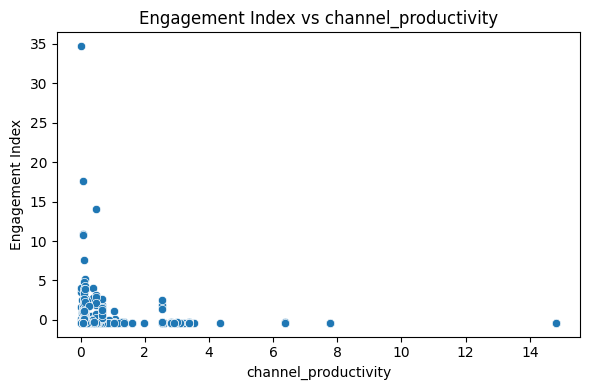

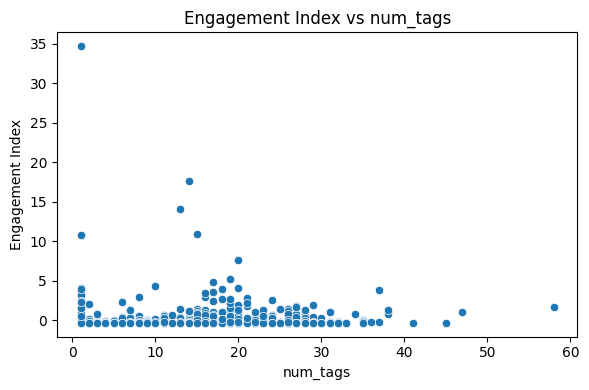

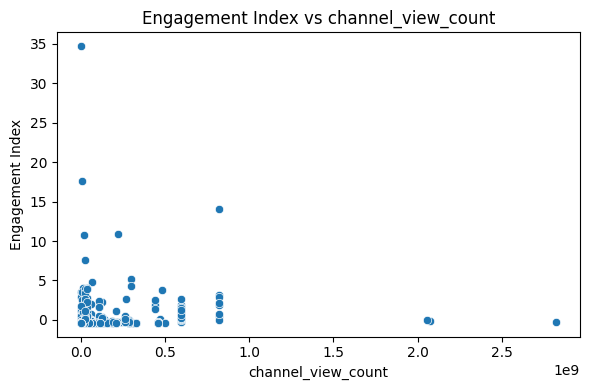

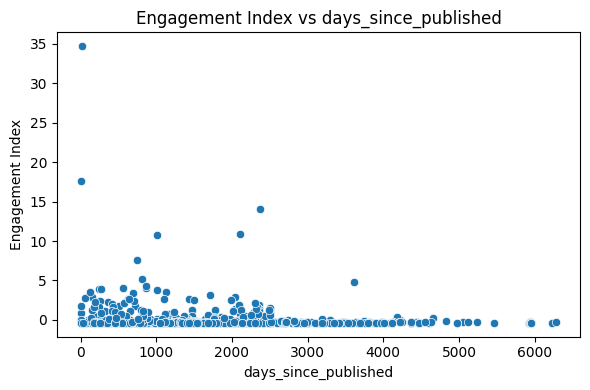

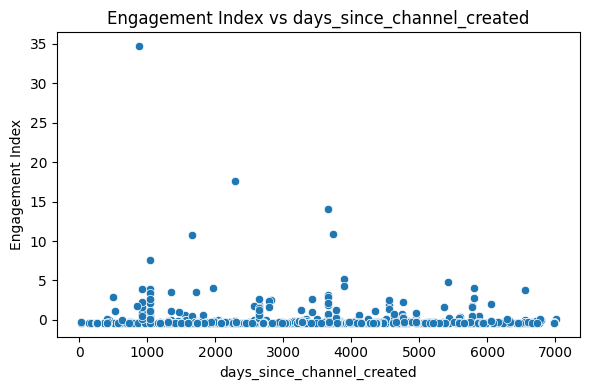

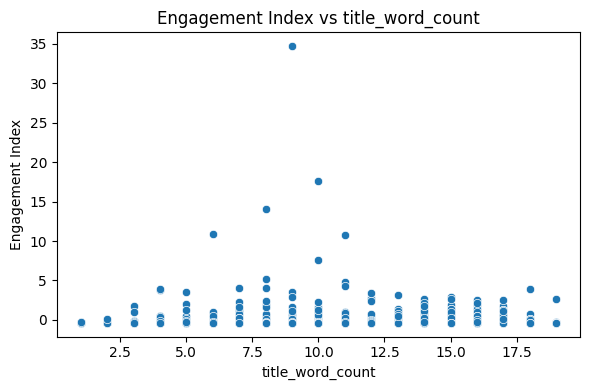

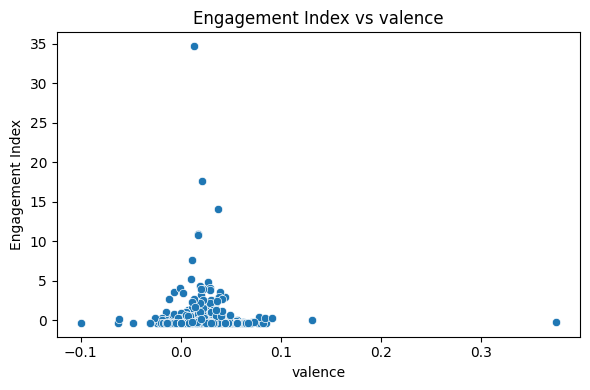

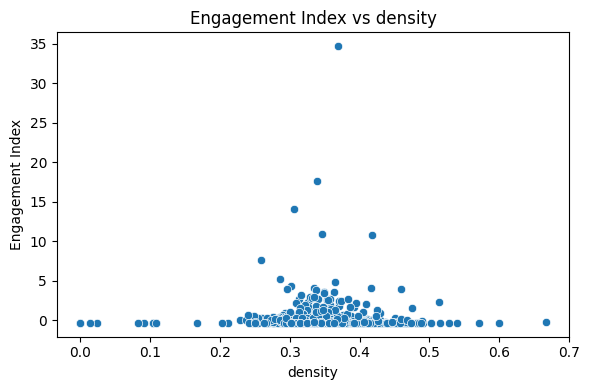

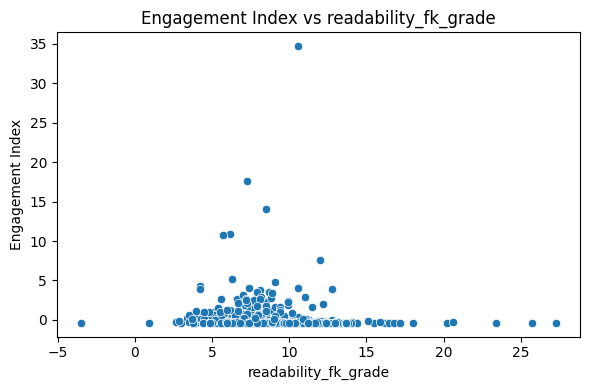

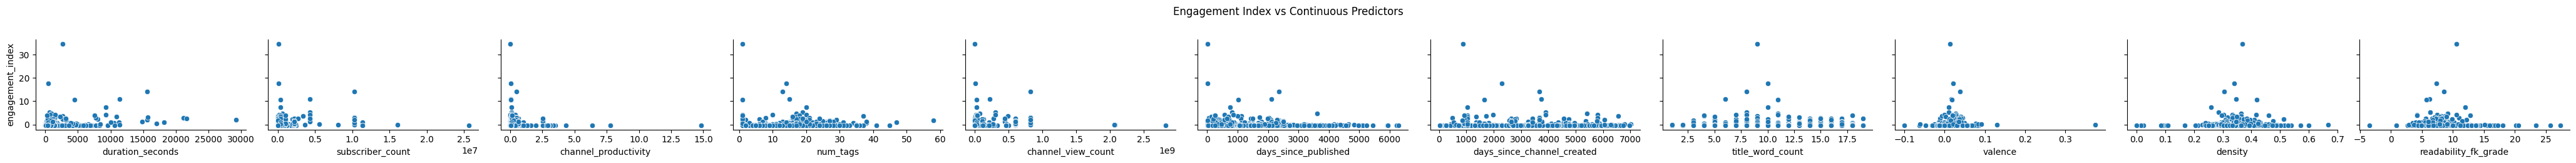

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

continuous_vars = [
    'duration_seconds', 'subscriber_count',
    'channel_productivity', 'num_tags', 'channel_view_count',
    'days_since_published', 'days_since_channel_created',
    'title_word_count', 'valence', 'density',
    'readability_fk_grade'
]

# Construct main dataset based only on interval + binary variables
df['log1p_engagement_index'] = np.log1p(df['engagement_index'])
interval_binary_vars = ['log1p_engagement_index', 'engagement_index'] + continuous_vars + ['is_hd', 'paid_product_placement']
df_cont = df[interval_binary_vars].dropna().copy()

# Add nominal data, ensure index alignment
df_cont = pd.concat([
    df_cont,
    df.loc[df_cont.index, ['audio_language', 'textual_language', 'country']]
], axis=1)

for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_cont[var], y=df_cont['engagement_index'])
    plt.title(f'Engagement Index vs {var}')
    plt.xlabel(var)
    plt.ylabel('Engagement Index')
    plt.tight_layout()
    plt.show()

sns.pairplot(df_cont, y_vars=['engagement_index'], x_vars=continuous_vars,
             kind='scatter', height=2.5, aspect=1.5)
plt.suptitle("Engagement Index vs Continuous Predictors", y=1.02)
plt.tight_layout()
plt.show()


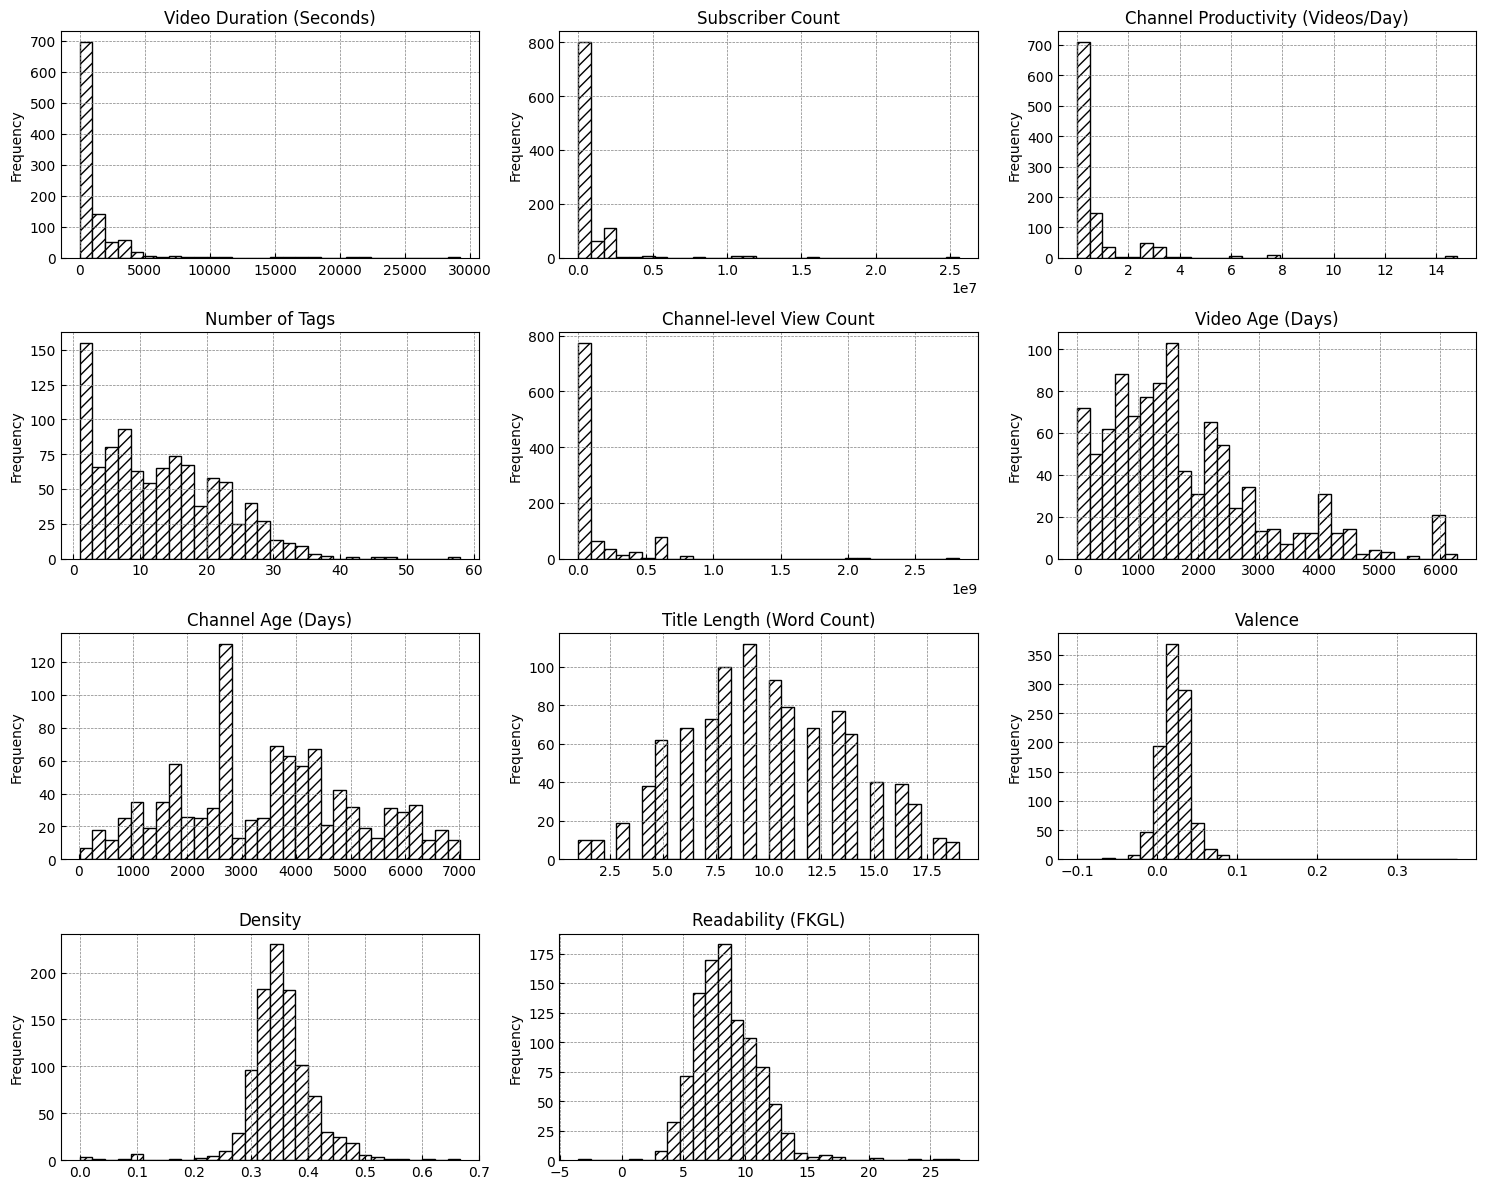

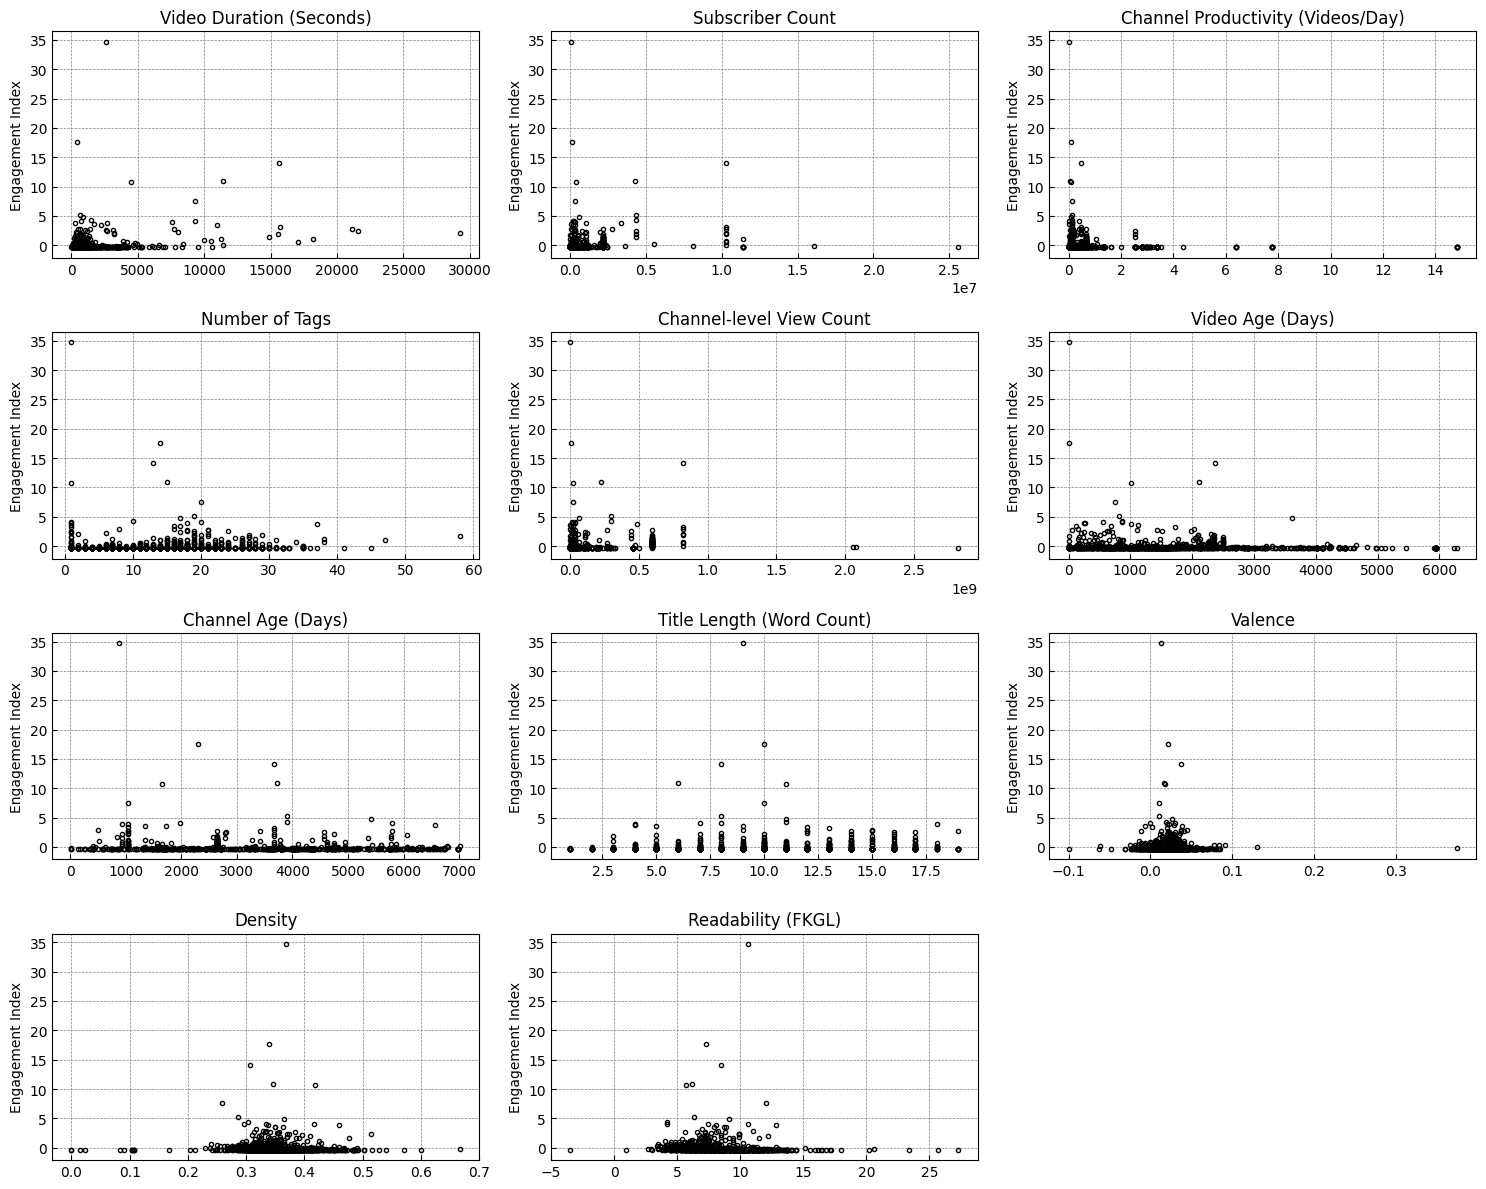

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Variable mapping (friendly names)
var_map = {
    'duration_seconds': 'Video Duration (Seconds)',
    'subscriber_count': 'Subscriber Count',
    'channel_productivity': 'Channel Productivity (Videos/Day)',
    'num_tags': 'Number of Tags',
    'channel_view_count': 'Channel-level View Count',
    'days_since_published': 'Video Age (Days)',
    'days_since_channel_created': 'Channel Age (Days)',
    'title_word_count': 'Title Length (Word Count)',
    'valence': 'Valence',
    'density': 'Density',
    'readability_fk_grade': 'Readability (FKGL)',
}

continuous_vars = list(var_map.keys())
# Include nominal variables when constructing df_cont
df['log1p_engagement_index'] = np.log1p(df['engagement_index'])

# Construct main dataset based only on interval + binary variables
interval_binary_vars = ['log1p_engagement_index', 'engagement_index'] + continuous_vars + ['is_hd', 'paid_product_placement']
df_cont = df[interval_binary_vars].dropna().copy()

# Add nominal data, ensure index alignment
df_cont = pd.concat([
    df_cont,
    df.loc[df_cont.index, ['audio_language', 'textual_language', 'country']]
], axis=1)

# Common style settings
plt.rcParams.update({
    "font.size": 10,
    "axes.edgecolor": "black",
    "axes.linewidth": 0.8,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "axes.grid": True,
    "grid.color": "grey",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "figure.facecolor": "white",   # Set global white background
    "axes.facecolor": "white"      # Set each subplot white background
})

# -------------------- HISTOGRAM ----------------------
num_cols = 3
num_rows = (len(continuous_vars) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3), facecolor="white")

for i, var in enumerate(continuous_vars):
    ax = axes.flat[i]
    ax.hist(df_cont[var], bins=30, color='white', edgecolor='black', hatch='///')
    ax.set_title(var_map[var])
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()

# -------------------- SCATTERPLOT ----------------------
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3), facecolor="white")

for i, var in enumerate(continuous_vars):
    ax = axes.flat[i]
    ax.plot(df_cont[var], df_cont['engagement_index'], 'o', markersize=3, markerfacecolor='none', markeredgecolor='black')
    ax.set_title(var_map[var])
    ax.set_xlabel('')
    ax.set_ylabel('Engagement Index')

for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()


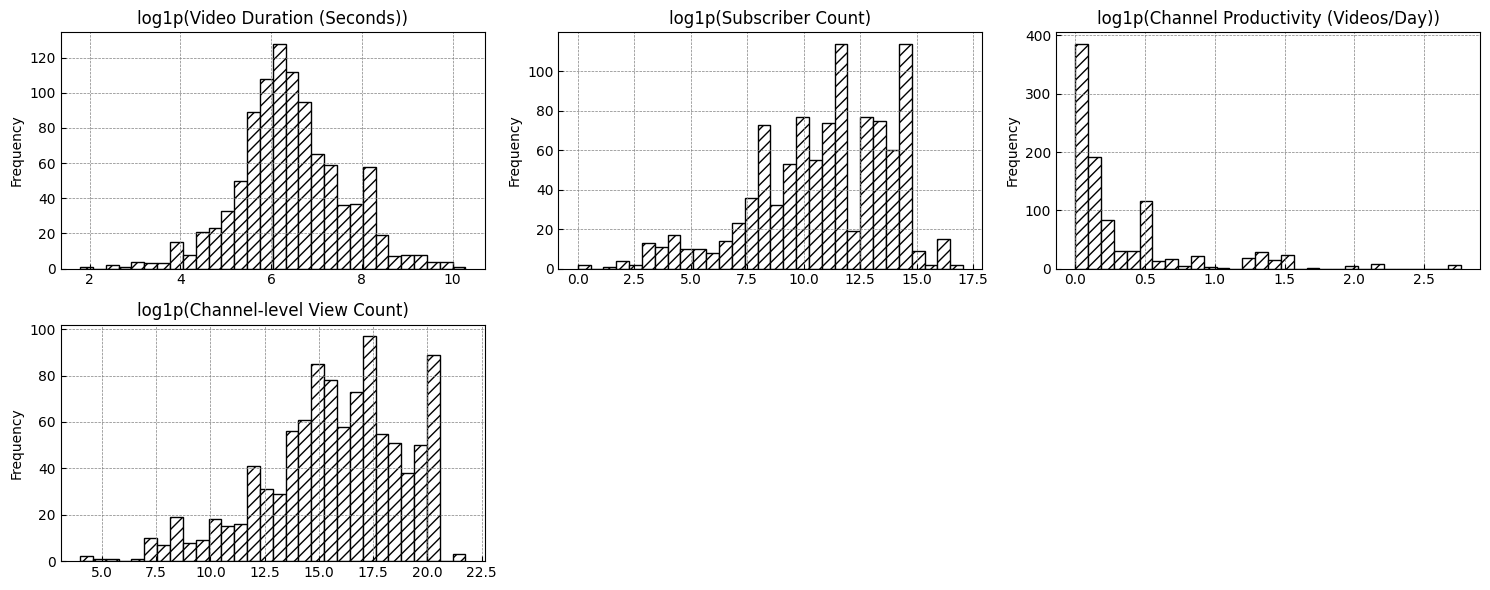

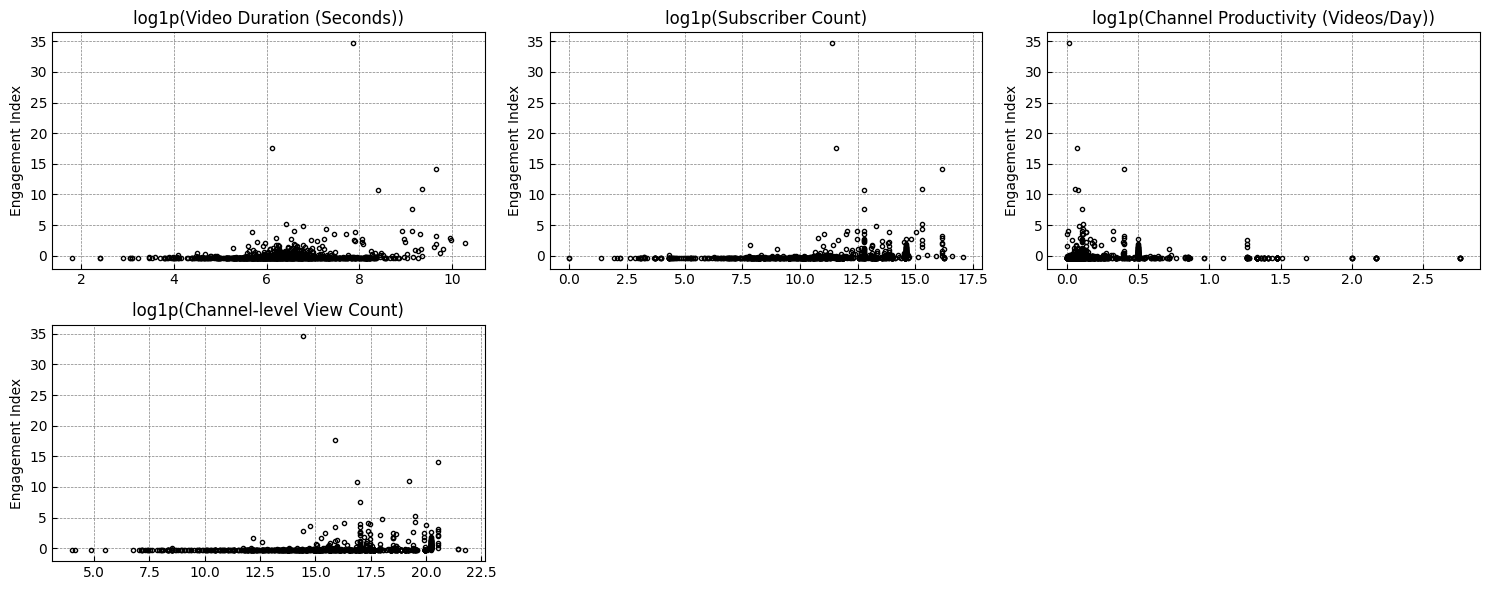

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

log_candidates = [
    'duration_seconds', 'subscriber_count',
    'channel_productivity', 'channel_view_count'
]

# Create log1p variablesles
for var in log_candidates:
    df_cont[f'log1p_{var}'] = np.log1p(df_cont[var])

# -------------------- LOG HISTOGRAM ----------------------
num_cols = 3
num_rows = (len(log_candidates) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3), facecolor="white")

for i, var in enumerate(log_candidates):
    ax = axes.flat[i]
    ax.hist(df_cont[f'log1p_{var}'], bins=30, color='white', edgecolor='black', hatch='///')
    ax.set_title(f'log1p({var_map[var]})')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()

# -------------------- LOG SCATTERPLOT ----------------------
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3), facecolor="white")

for i, var in enumerate(log_candidates):
    ax = axes.flat[i]
    ax.plot(df_cont[f'log1p_{var}'], df_cont['engagement_index'], 'o',
            markersize=3, markerfacecolor='none', markeredgecolor='black')
    ax.set_title(f'log1p({var_map[var]})')
    ax.set_xlabel('')
    ax.set_ylabel('Engagement Index')

for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()


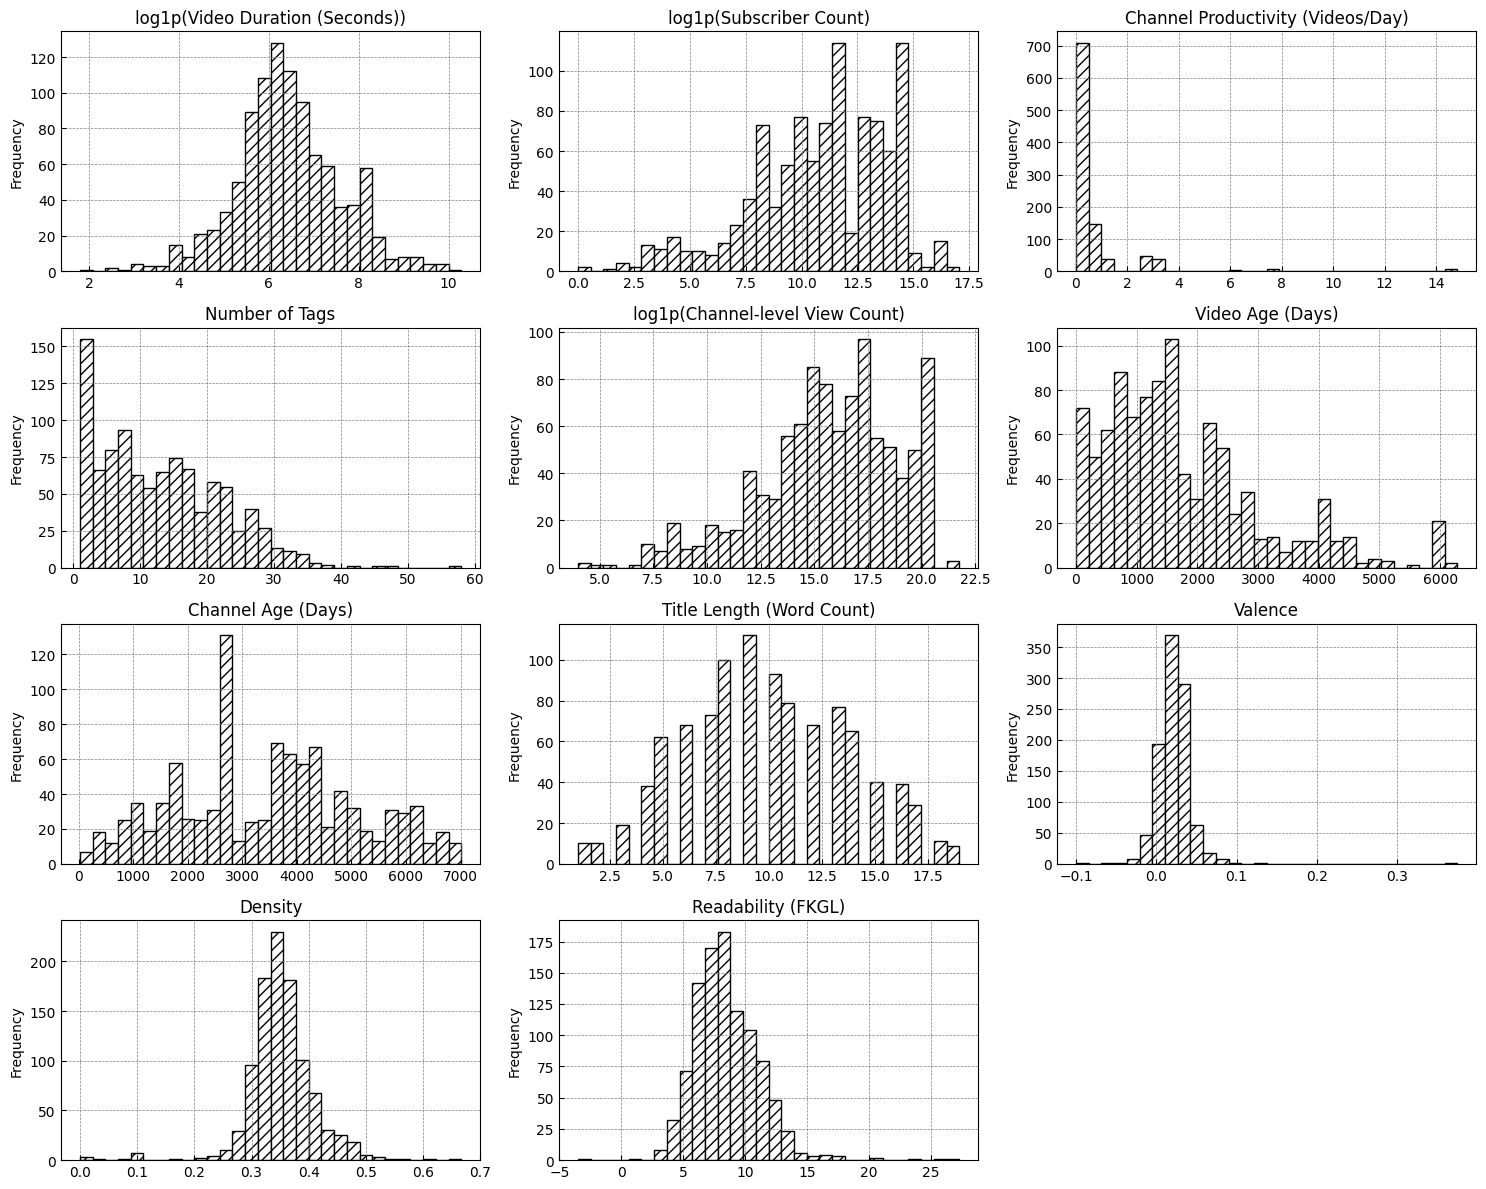

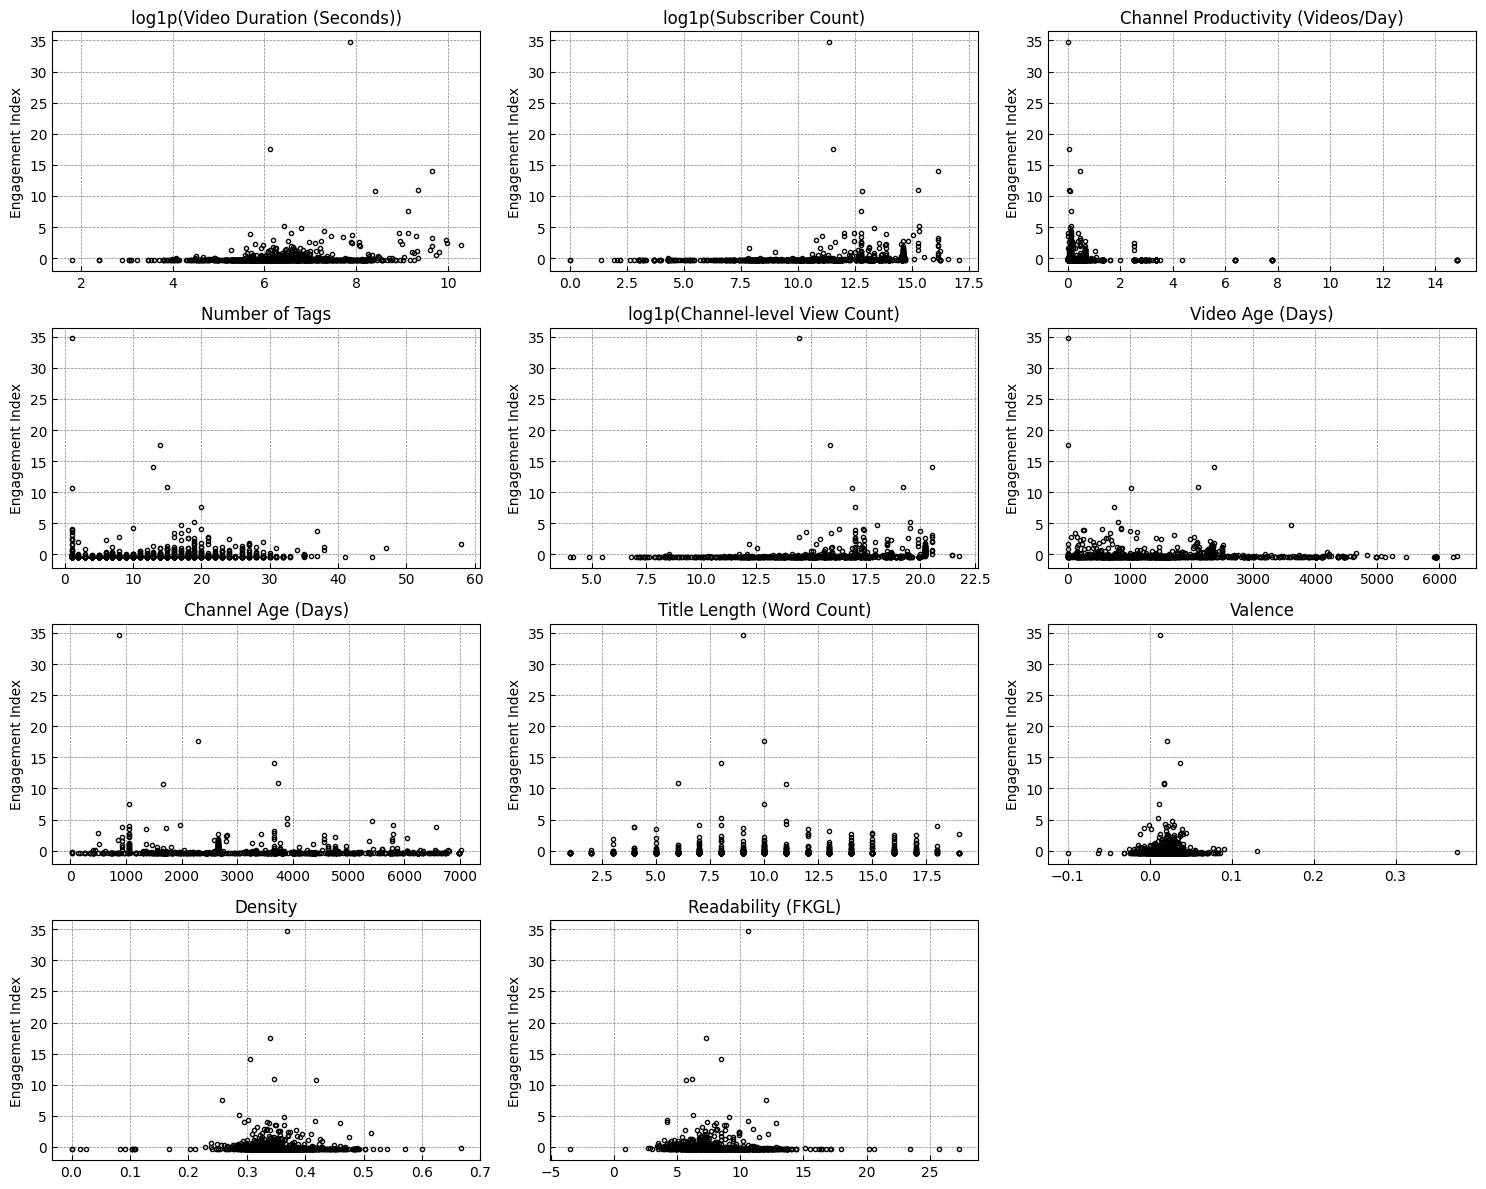

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Variable mapping (friendly names)
var_map = {
    'duration_seconds': 'Video Duration (Seconds)',
    'subscriber_count': 'Subscriber Count',
    'channel_productivity': 'Channel Productivity (Videos/Day)',
    'num_tags': 'Number of Tags',
    'channel_view_count': 'Channel-level View Count',
    'days_since_published': 'Video Age (Days)',
    'days_since_channel_created': 'Channel Age (Days)',
    'title_word_count': 'Title Length (Word Count)',
    'valence': 'Valence',
    'density': 'Density',
    'readability_fk_grade': 'Readability (FKGL)',
}

# Define which variables need log1p
log_vars = ['duration_seconds', 'subscriber_count', 'channel_view_count']

# Data preparation
continuous_vars = list(var_map.keys())
# Include nominal variables when constructing df_cont
df['log1p_engagement_index'] = np.log1p(df['engagement_index'])

# Build main dataset based only on interval + binary variables
interval_binary_vars = ['log1p_engagement_index', 'engagement_index'] + continuous_vars + ['is_hd', 'paid_product_placement']
df_cont = df[interval_binary_vars].dropna().copy()

# Add nominal data, ensure index consistency
df_cont = pd.concat([
    df_cont,
    df.loc[df_cont.index, ['audio_language', 'textual_language', 'country']]
], axis=1)

# Create log1p variables
for var in log_vars:
    df_cont[f'log1p_{var}'] = np.log1p(df_cont[var])

# Update variable list and labels
final_vars = []
final_var_map = {}

for var in continuous_vars:
    if var in log_vars:
        final_vars.append(f'log1p_{var}')
        final_var_map[f'log1p_{var}'] = f'log1p({var_map[var]})'
    else:
        final_vars.append(var)
        final_var_map[var] = var_map[var]

# Common style settings
plt.rcParams.update({
    "font.size": 10,
    "axes.edgecolor": "black",
    "axes.linewidth": 0.8,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "axes.grid": True,
    "grid.color": "grey",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "figure.facecolor": "white",
    "axes.facecolor": "white"
})

# -------------------- HISTOGRAM ----------------------
num_cols = 3
num_rows = (len(final_vars) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3), facecolor="white")

for i, var in enumerate(final_vars):
    ax = axes.flat[i]
    ax.hist(df_cont[var], bins=30, color='white', edgecolor='black', hatch='///')
    ax.set_title(final_var_map[var])
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()

# -------------------- SCATTERPLOT ----------------------
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3), facecolor="white")

for i, var in enumerate(final_vars):
    ax = axes.flat[i]
    ax.plot(df_cont[var], df_cont['engagement_index'], 'o',
            markersize=3, markerfacecolor='none', markeredgecolor='black')
    ax.set_title(final_var_map[var])
    ax.set_xlabel('')
    ax.set_ylabel('Engagement Index')

for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()


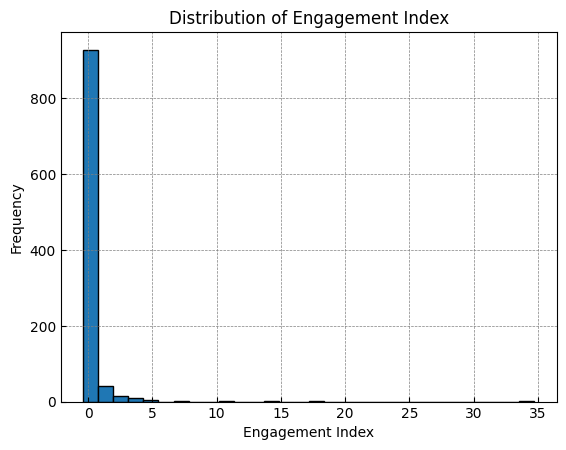

In [31]:
plt.hist(df_cont['engagement_index'], bins=30, edgecolor='black')
plt.xlabel('Engagement Index')
plt.ylabel('Frequency')
plt.title('Distribution of Engagement Index')
plt.show()


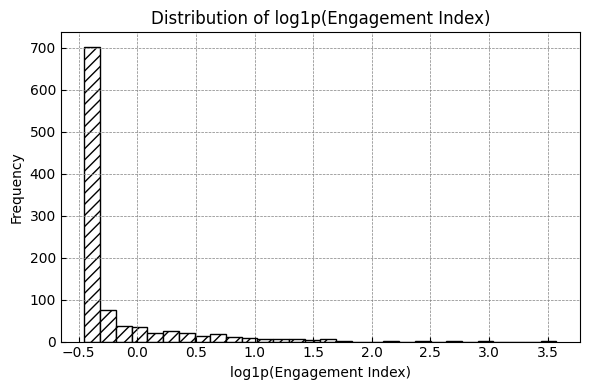

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure consistent style
plt.rcParams.update({
    "font.size": 10,
    "axes.edgecolor": "black",
    "axes.linewidth": 0.8,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "axes.grid": True,
    "grid.color": "grey",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "figure.facecolor": "white",
    "axes.facecolor": "white"
})

# Compute log1p
df_cont['log1p_engagement_index'] = np.log1p(df_cont['engagement_index'])

# Create histogram with matching style
plt.figure(figsize=(6, 4), facecolor="white")
plt.hist(df_cont['log1p_engagement_index'], bins=30, color='white', edgecolor='black', hatch='///')
plt.xlabel('log1p(Engagement Index)')
plt.ylabel('Frequency')
plt.title('Distribution of log1p(Engagement Index)')
plt.tight_layout()
plt.show()


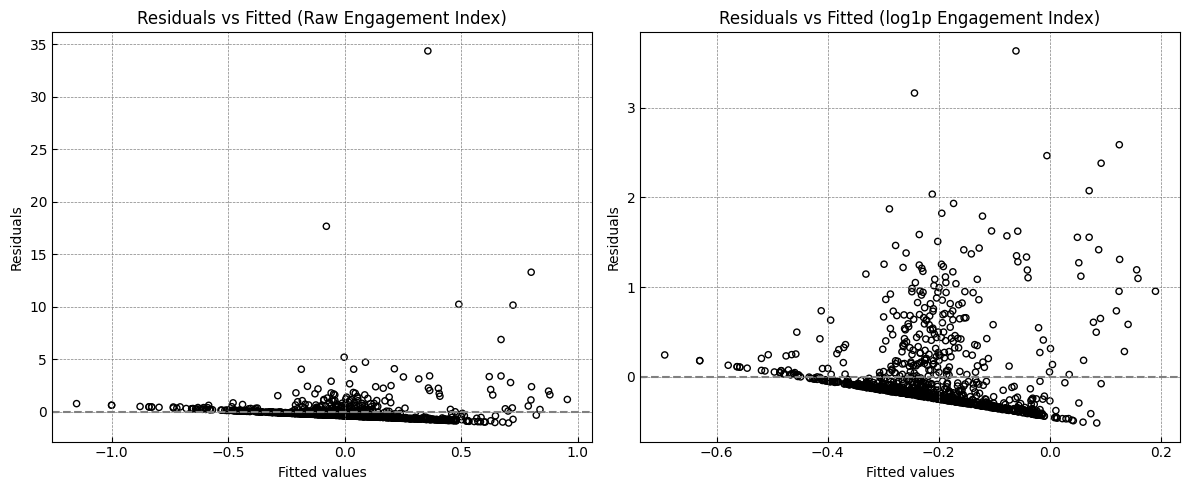

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assume df_cont already contains the required variables
# Simple regression example: use one or more features (here using duration_seconds as an example)
X = df_cont[['log1p_duration_seconds']]  # You can replace this with your actual feature set
X = sm.add_constant(X)  # Add intercept

# Regression with raw dependent variable
y_raw = df_cont['engagement_index']
model_raw = sm.OLS(y_raw, X).fit()
fitted_raw = model_raw.fittedvalues
resid_raw = model_raw.resid

# Regression with log1p dependent variable
df_cont['log1p_engagement_index'] = np.log1p(df_cont['engagement_index'])
y_log = df_cont['log1p_engagement_index']
model_log = sm.OLS(y_log, X).fit()
fitted_log = model_log.fittedvalues
resid_log = model_log.resid

# Plot residual plots for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# Raw residual plot
axes[0].scatter(fitted_raw, resid_raw, edgecolor='black', facecolor='none', s=20)
axes[0].axhline(0, color='grey', linestyle='--')
axes[0].set_title('Residuals vs Fitted (Raw Engagement Index)')
axes[0].set_xlabel('Fitted values')
axes[0].set_ylabel('Residuals')

# log1p residual plot
axes[1].scatter(fitted_log, resid_log, edgecolor='black', facecolor='none', s=20)
axes[1].axhline(0, color='grey', linestyle='--')
axes[1].set_title('Residuals vs Fitted (log1p Engagement Index)')
axes[1].set_xlabel('Fitted values')
axes[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()


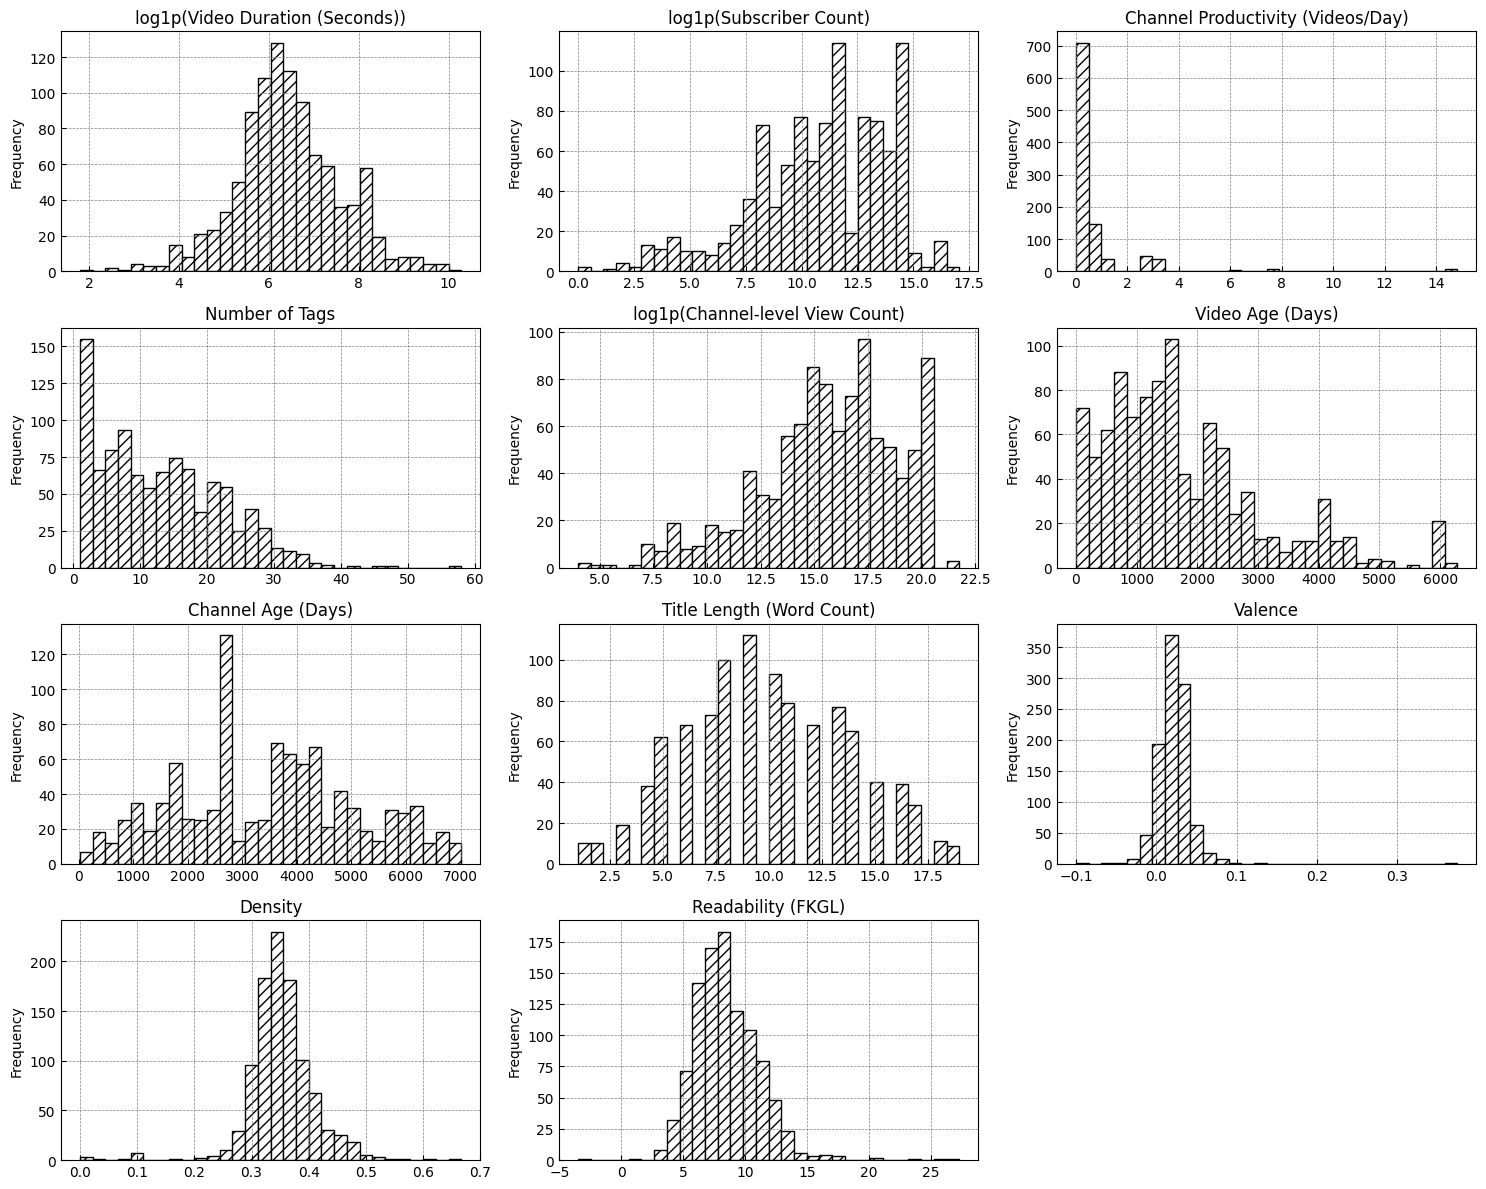

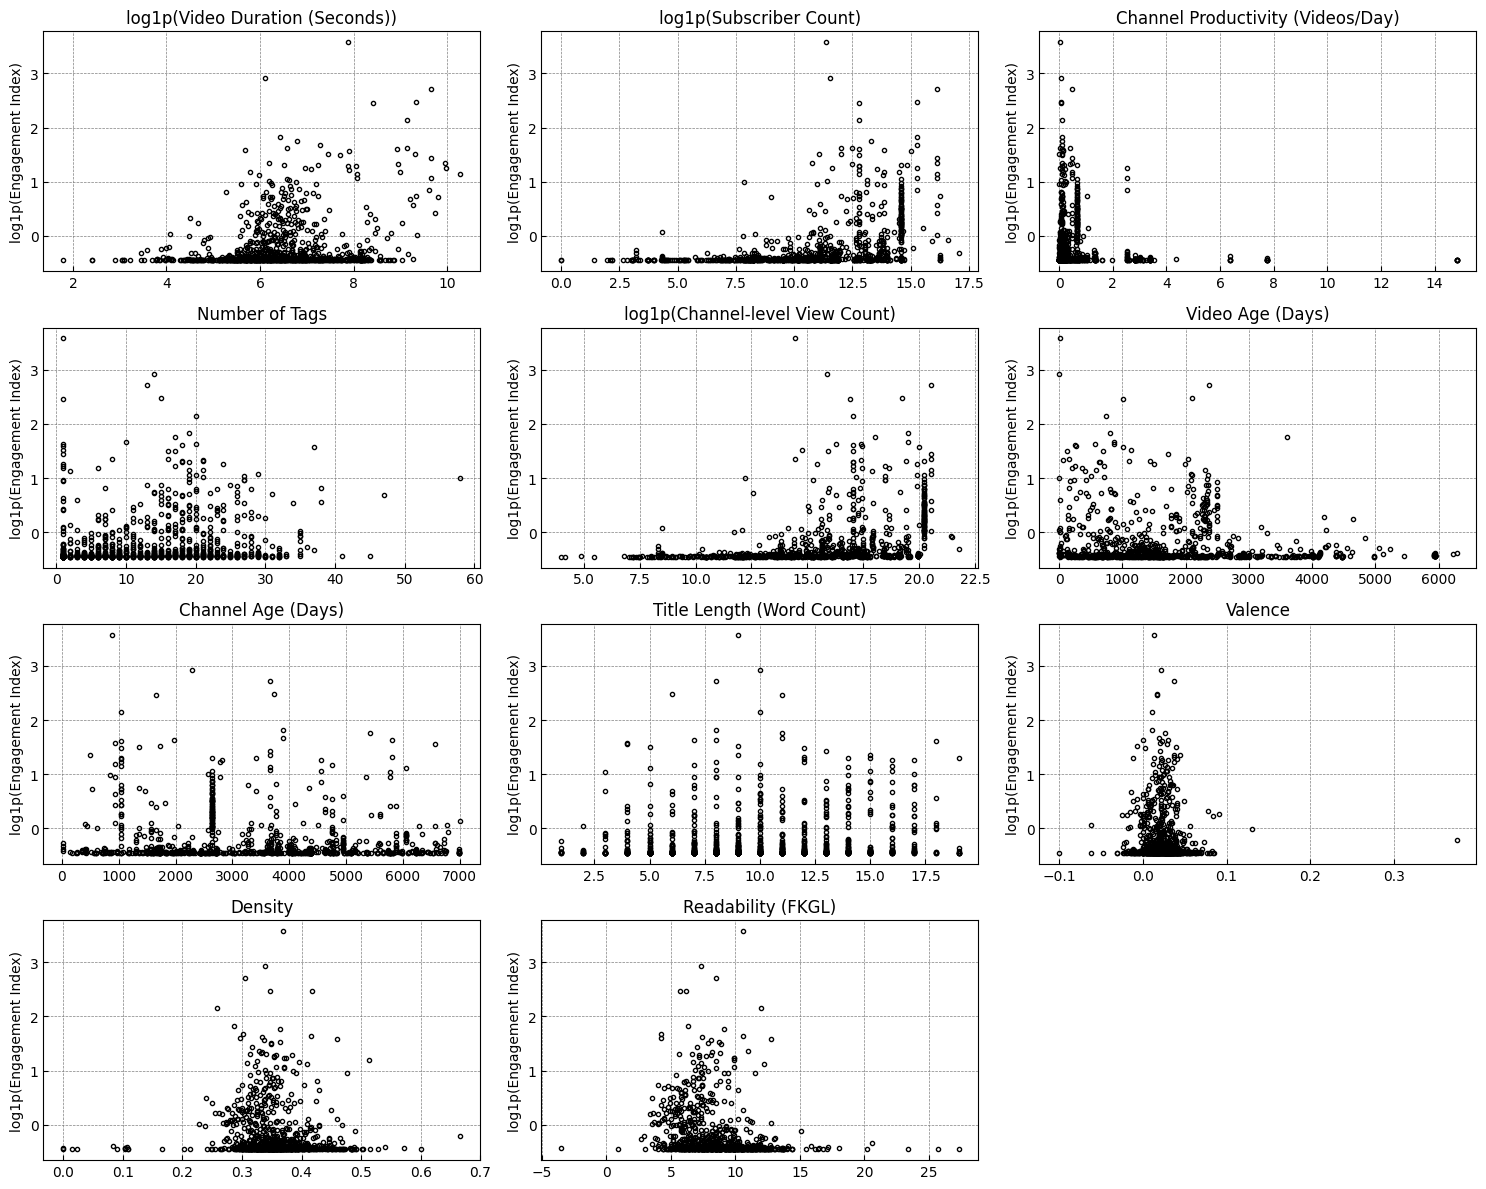

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create log1p(engagement index)
df_cont['log1p_engagement_index'] = np.log1p(df_cont['engagement_index'])

# -------------------- HISTOGRAM ----------------------
# Keep predictor histograms unchanged
num_cols = 3
num_rows = (len(final_vars) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3), facecolor="white")

for i, var in enumerate(final_vars):
    ax = axes.flat[i]
    ax.hist(df_cont[var], bins=30, color='white', edgecolor='black', hatch='///')
    ax.set_title(final_var_map[var])
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()

# -------------------- SCATTERPLOT ----------------------
# Change Y to log1p(engagement index)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3), facecolor="white")

for i, var in enumerate(final_vars):
    ax = axes.flat[i]
    ax.plot(df_cont[var], df_cont['log1p_engagement_index'], 'o',
            markersize=3, markerfacecolor='none', markeredgecolor='black')
    ax.set_title(final_var_map[var])
    ax.set_xlabel('')
    ax.set_ylabel('log1p(Engagement Index)')

for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()


In [36]:
len(df_cont)
df_cont.columns

Index(['log1p_engagement_index', 'engagement_index', 'duration_seconds',
       'subscriber_count', 'channel_productivity', 'num_tags',
       'channel_view_count', 'days_since_published',
       'days_since_channel_created', 'title_word_count', 'valence', 'density',
       'readability_fk_grade', 'is_hd', 'paid_product_placement',
       'audio_language', 'textual_language', 'country',
       'log1p_duration_seconds', 'log1p_subscriber_count',
       'log1p_channel_view_count'],
      dtype='object')

In [ ]:
from scipy.stats import spearmanr
import pandas as pd

# Calculate Spearman correlation coefficient and p-value
results = []
for var in final_vars:
    coef, pval = spearmanr(df_cont['log1p_engagement_index'], df_cont[var], nan_policy='omit')
    results.append({
        'Variable': var,
        'Friendly Name': final_var_map[var],
        'Spearman R': coef,
        'P-Value': pval
    })

# Convert to DataFrame for easier viewing
spearman_df = pd.DataFrame(results)

# Sort by absolute correlation coefficient
spearman_df = spearman_df.sort_values(by='Spearman R', key=lambda x: x.abs(), ascending=False)

# Display results
from IPython.display import display
display(spearman_df)


,Variable,Friendly Name,Spearman R,P-Value
1,log1p_subscriber_count,log1p(Subscriber Count),0.563314,5.728414e-85
4,log1p_channel_view_count,log1p(Channel-level View Count),0.504207,1.004527e-65
10,readability_fk_grade,Readability (FKGL),-0.312439,3.966169e-24
3,num_tags,Number of Tags,0.240756,1.115277e-14
0,log1p_duration_seconds,log1p(Video Duration (Seconds)),0.172927,3.616742e-08
7,title_word_count,Title Length (Word Count),0.150095,1.821424e-06
2,channel_productivity,Channel Productivity (Videos/Day),0.117238,1.997702e-04
9,density,Density,-0.109233,5.327080e-04
5,days_since_published,Video Age (Days),-0.088160,5.228379e-03
6,days_since_channel_created,Channel Age (Days),-0.075091,1.743726e-02


# Binary Variables Statistical Analysis

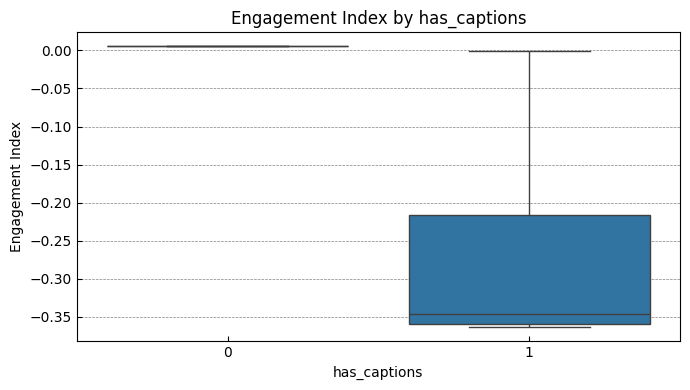

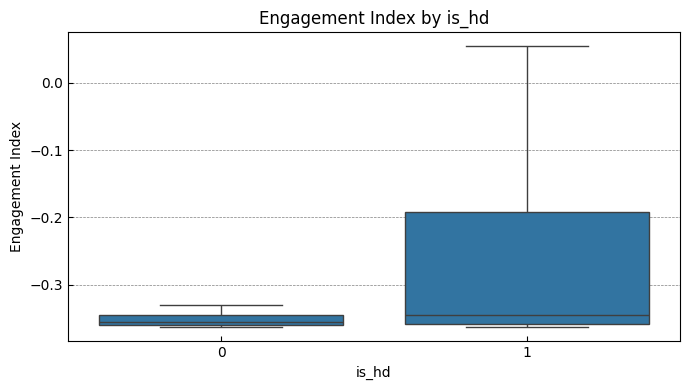

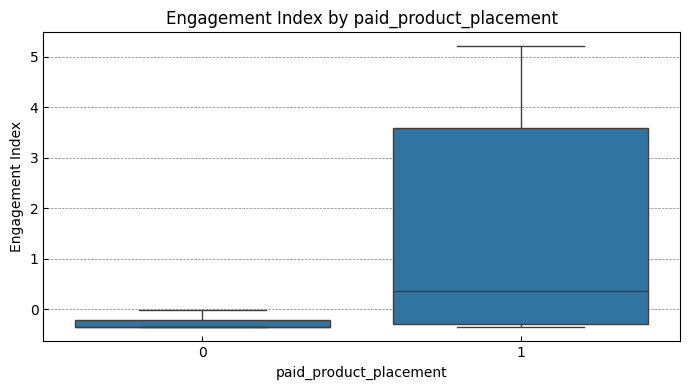

In [39]:

categorical_vars = ['has_captions', 'is_hd', 'paid_product_placement']

for var in categorical_vars:
    if var in df.columns:
        plt.figure(figsize=(7, 4))
        sns.boxplot(x=var, y='engagement_index', data=df, showfliers=False)
        plt.title(f'Engagement Index by {var}')
        plt.xlabel(var)
        plt.ylabel('Engagement Index')
        plt.tight_layout()

        plt.show()

In [40]:
print("Number of videos with hd quality:", df_cont['is_hd'].sum())
print("Number of videos with sd quality:", df_cont['is_hd'].count() - df_cont['is_hd'].sum())
print("Number of videos with paid product placement:", df_cont['paid_product_placement'].sum())
print("Number of videos with no paid product placement:", df_cont['paid_product_placement'].count() - df_cont['paid_product_placement'].sum())


Number of videos with hd quality: 933
Number of videos with sd quality: 69
Number of videos with paid product placement: 7
Number of videos with no paid product placement: 995


# Nominal Variables Statistical Analysis

In [ ]:
df['log1p_engagement_index'] = np.log1p(df['engagement_index'])

# Construct main dataset based only on interval + binary variables
interval_binary_vars = ['log1p_engagement_index', 'engagement_index'] + ['channel_productivity', 'num_tags', 'days_since_published', 'days_since_channel_created', 'title_word_count', 'valence', 'density', 'readability_fk_grade'] + ['log1p_duration_seconds', 'log1p_subscriber_count',
    'log1p_channel_view_count']
df_cont = df_cont[interval_binary_vars].dropna().copy()

# Add nominal data, ensure index alignment
df_cont = pd.concat([
    df_cont,
    df.loc[df_cont.index, ['audio_language', 'textual_language', 'country']]
], axis=1)


In [44]:
len(df_cont)
df_cont.columns

Index(['log1p_engagement_index', 'engagement_index', 'channel_productivity',
       'num_tags', 'days_since_published', 'days_since_channel_created',
       'title_word_count', 'valence', 'density', 'readability_fk_grade',
       'log1p_duration_seconds', 'log1p_subscriber_count',
       'log1p_channel_view_count', 'audio_language', 'textual_language',
       'country'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import kruskal

def kruskal_test_by_group(data, group_col, target_col, min_group_size=30):
    """Run Kruskal-Wallis test on groups with sufficient size."""
    df_local = data[[group_col, target_col]]
    group_counts = df_local[group_col].value_counts()
    valid_groups = group_counts[group_counts >= min_group_size].index.tolist()
    
    if len(valid_groups) < 2:
        return {'statistic': np.nan, 'p_value': np.nan, 'groups_tested': 0}
    
    group_data = [df_local[df_local[group_col] == group][target_col] for group in valid_groups]
    
    stat, p = kruskal(*group_data)
    return {'statistic': stat, 'p_value': p, 'groups_tested': len(valid_groups)}

# Ensure target_vars is defined
target_vars = ['log1p_engagement_index']  # Modify as needed

categorical_features = ['audio_language', 'textual_language', 'country']

results_list = []
for target in target_vars:
    for feature in categorical_features:
        result = kruskal_test_by_group(data=df_cont, group_col=feature, target_col=target)
        results_list.append({
            'target': target,
            'feature': feature,
            'H-statistic': result['statistic'],
            'p_value': result['p_value'],
            'groups_tested': result['groups_tested'],
            'method': 'Kruskal-Wallis'
        })

results_df = pd.DataFrame(results_list)
display(results_df)


,target,feature,H-statistic,p_value,groups_tested,method
0,log1p_engagement_index,audio_language,59.577285,1.486198e-11,6,Kruskal-Wallis
1,log1p_engagement_index,textual_language,33.976154,4.189594e-08,3,Kruskal-Wallis
2,log1p_engagement_index,country,24.466279,4.866481e-06,3,Kruskal-Wallis


C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\4200013324.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([df_local[df_local[feature] == g][target_col] for g in sorted_groups],
C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\4200013324.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([df_local[df_local[feature] == g][target_col] for g in sorted_groups],
C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\4200013324.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([df_local[df_local[feature] == g][target_col] for g in sorted_groups],


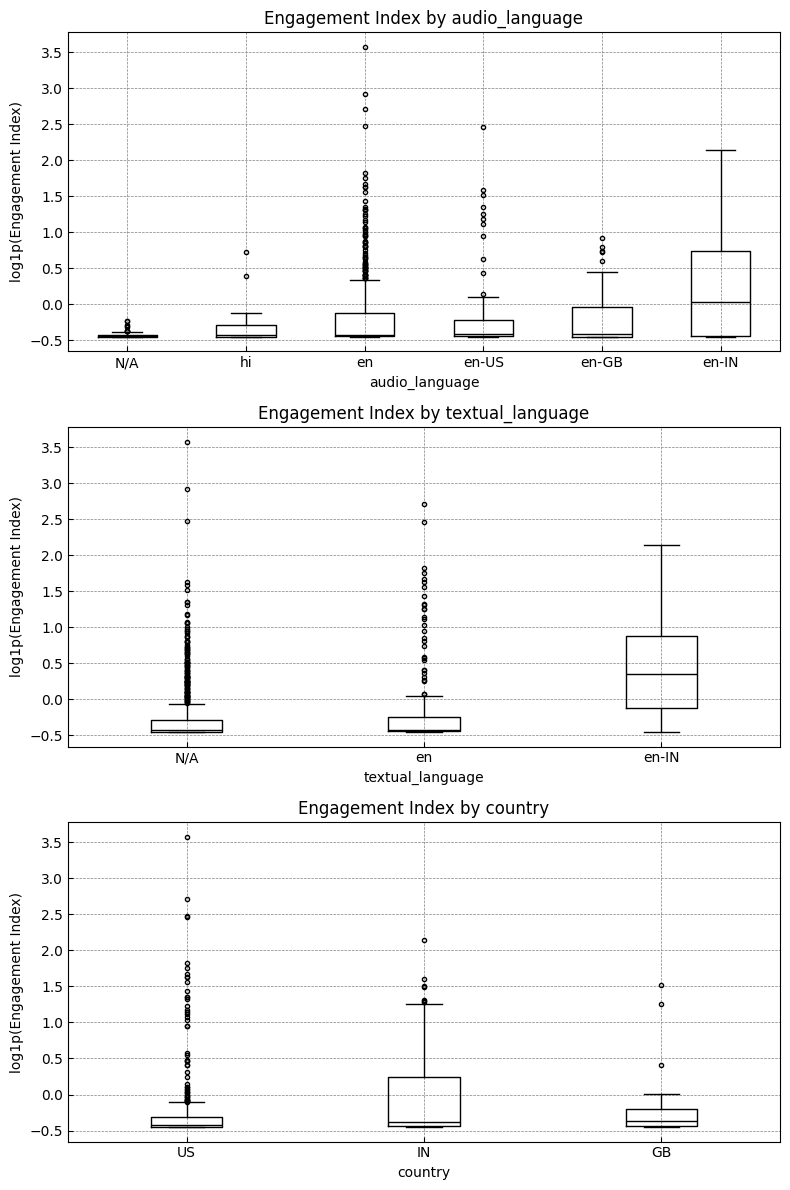

In [ ]:
import matplotlib.pyplot as plt

categorical_features = ['audio_language', 'textual_language', 'country']
target_col = 'log1p_engagement_index'

num_cols = 1
num_rows = len(categorical_features)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4 * num_rows), sharey=True)

if num_rows == 1:
    axes = [axes]  # Ensure axes is iterable

for ax, feature in zip(axes, categorical_features):
    df_local = df_cont[[feature, target_col]]
    
    # Keep only groups with sufficient sample size
    group_counts = df_local[feature].value_counts()
    valid_groups = group_counts[group_counts >= 30].index.tolist()
    df_local = df_local[df_local[feature].isin(valid_groups)]
    
    # Compute median for sorting
    medians = df_local.groupby(feature)[target_col].median()
    sorted_groups = medians.sort_values().index.tolist()
    
    # Draw boxplot sorted by median
    ax.boxplot([df_local[df_local[feature] == g][target_col] for g in sorted_groups],
               labels=sorted_groups, patch_artist=False, boxprops=dict(color='black'),
               medianprops=dict(color='black'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(markerfacecolor='none', marker='o', color='black', markersize=3))
    
    ax.set_title(f'Engagement Index by {feature}')
    ax.set_ylabel('log1p(Engagement Index)')
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()


C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\1783123235.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data,
C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\1783123235.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data,


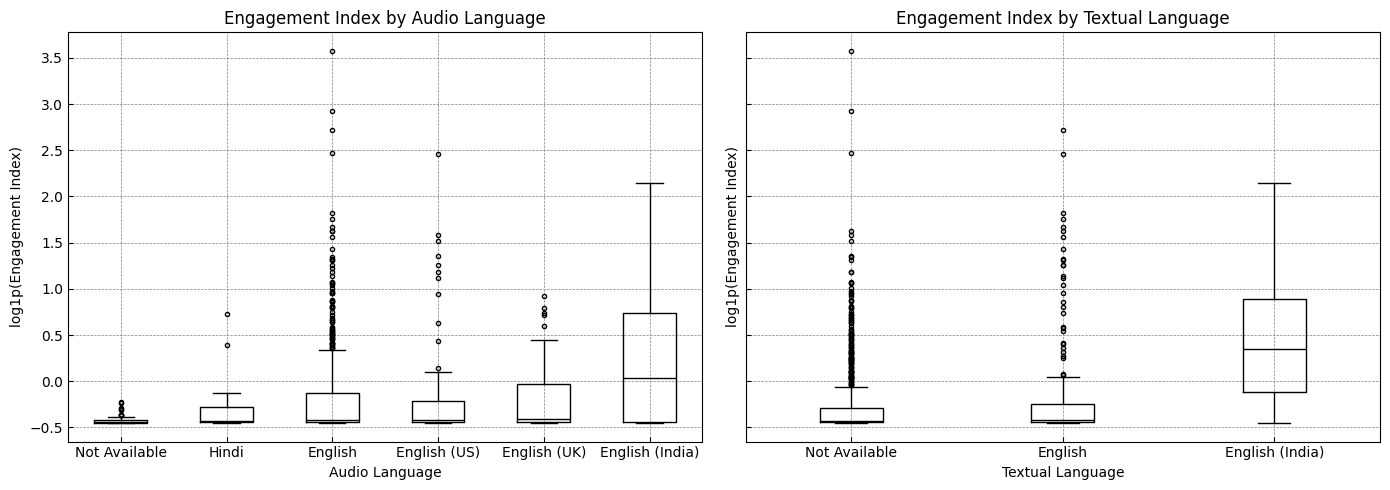

C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\1783123235.py:71: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,


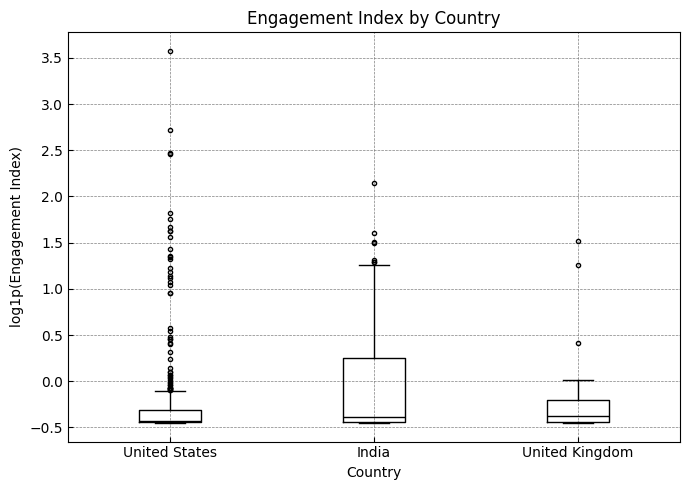

In [ ]:
import matplotlib.pyplot as plt

# Example mapping dictionaries (adjust as needed for your data)
language_map = {
    'en': 'English',
    'en-US': 'English (US)',
    'en-GB': 'English (UK)',
    'en-IN': 'English (India)',
    'hi': 'Hindi',
    'N/A': 'Not Available'
}

country_map = {
    'US': 'United States',
    'IN': 'India',
    'GB': 'United Kingdom'
}

target_col = 'log1p_engagement_index'

# ------- Audio language and textual language in one figure -------
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for ax, feature in zip(axes, ['audio_language', 'textual_language']):
    df_local = df_cont[[feature, target_col]].dropna()

    group_counts = df_local[feature].value_counts()
    valid_groups = group_counts[group_counts >= 30].index.tolist()

    df_local = df_local[df_local[feature].isin(valid_groups)]

    # Sort by median
    median_map = {
        g: df_local[df_local[feature] == g][target_col].median() for g in valid_groups
    }
    sorted_groups = sorted(valid_groups, key=lambda g: median_map[g])

    labels = [language_map.get(g, g) for g in sorted_groups]
    data = [df_local[df_local[feature] == g][target_col] for g in sorted_groups]

    ax.boxplot(data,
               labels=labels, patch_artist=False,
               boxprops=dict(color='black'),
               medianprops=dict(color='black'),
               whiskerprops=dict(color='black'),
               capprops=dict(color='black'),
               flierprops=dict(markerfacecolor='none', marker='o', color='black', markersize=3))

    ax.set_title(f'Engagement Index by {feature.replace("_", " ").title()}')
    ax.set_xlabel(feature.replace("_", " ").title())
    ax.set_ylabel('log1p(Engagement Index)')

plt.tight_layout()
plt.show()

# ------- Country in a separate figure -------
df_local = df_cont[['country', target_col]].dropna()
group_counts = df_local['country'].value_counts()
valid_groups = group_counts[group_counts >= 30].index.tolist()
df_local = df_local[df_local['country'].isin(valid_groups)]
median_map = {
    g: df_local[df_local['country'] == g][target_col].median() for g in valid_groups
}
sorted_groups = sorted(valid_groups, key=lambda g: median_map[g])

labels = [country_map.get(g, g) for g in sorted_groups]
data = [df_local[df_local['country'] == g][target_col] for g in sorted_groups]

plt.figure(figsize=(7, 5))
plt.boxplot(data,
            labels=labels, patch_artist=False,
            boxprops=dict(color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='none', marker='o', color='black', markersize=3))
plt.title('Engagement Index by Country')
plt.xlabel('Country')
plt.ylabel('log1p(Engagement Index)')
plt.tight_layout()
plt.show()


C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\562550219.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data,
C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\562550219.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data,


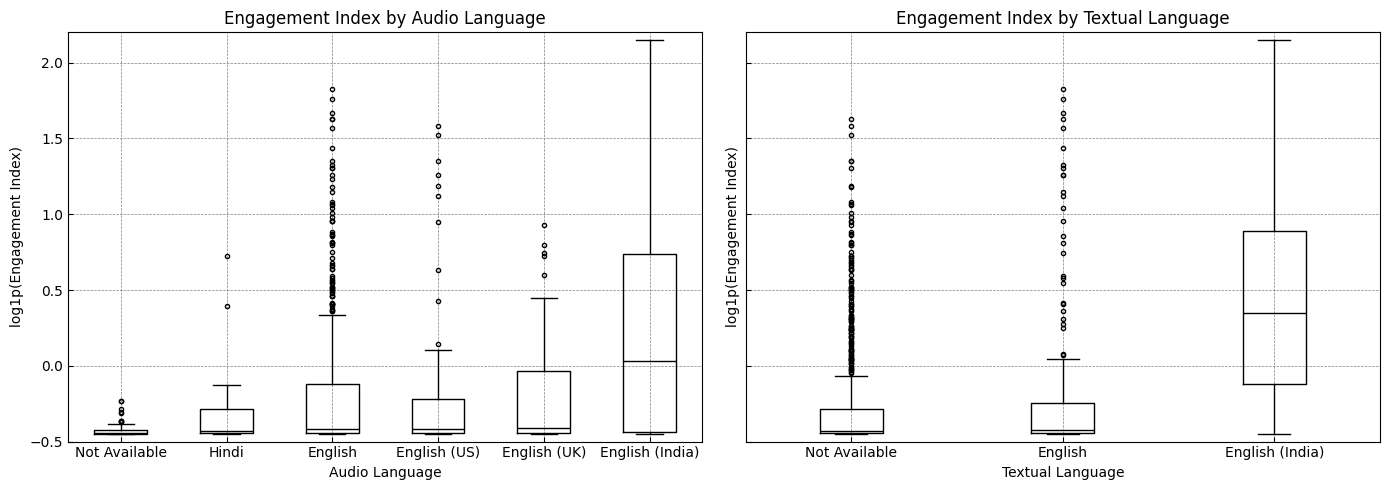

C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\562550219.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,


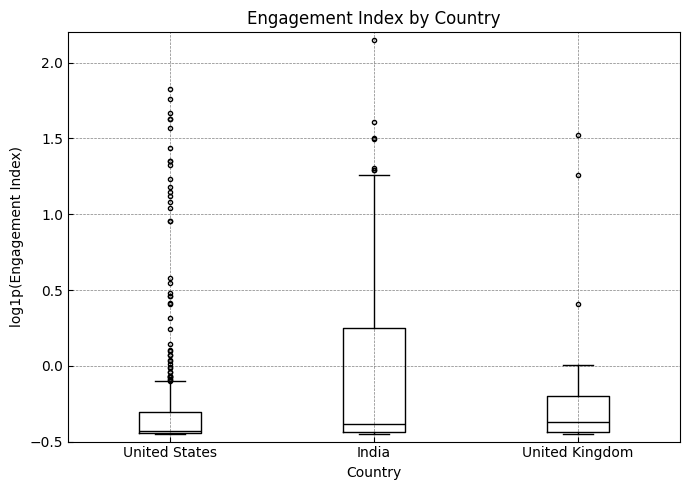

In [ ]:
import matplotlib.pyplot as plt

# Example mapping dictionaries (adjust as needed for your data)
language_map = {
    'en': 'English',
    'en-US': 'English (US)',
    'en-GB': 'English (UK)',
    'en-IN': 'English (India)',
    'hi': 'Hindi',
    'N/A': 'Not Available'
}

country_map = {
    'US': 'United States',
    'IN': 'India',
    'GB': 'United Kingdom'
}

target_col = 'log1p_engagement_index'

# You can manually set the y-axis upper and lower limits here
y_lower = -0.5
y_upper = 2.2  # Adjust according to your data, e.g., 1.0 or 1.5

# ------- Audio language and textual language in one figure -------
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for ax, feature in zip(axes, ['audio_language', 'textual_language']):
    df_local = df_cont[[feature, target_col]].dropna()

    group_counts = df_local[feature].value_counts()
    valid_groups = group_counts[group_counts >= 30].index.tolist()

    df_local = df_local[df_local[feature].isin(valid_groups)]

    # Sort by median
    median_map = {
        g: df_local[df_local[feature] == g][target_col].median() for g in valid_groups
    }
    sorted_groups = sorted(valid_groups, key=lambda g: median_map[g])

    labels = [language_map.get(g, g) for g in sorted_groups]
    data = [df_local[df_local[feature] == g][target_col] for g in sorted_groups]

    ax.boxplot(data,
               labels=labels, patch_artist=False,
               boxprops=dict(color='black'),
               medianprops=dict(color='black'),
               whiskerprops=dict(color='black'),
               capprops=dict(color='black'),
               flierprops=dict(markerfacecolor='none', marker='o', color='black', markersize=3))

    ax.set_ylim(y_lower, y_upper)  # Set y-axis range
    ax.set_title(f'Engagement Index by {feature.replace("_", " ").title()}')
    ax.set_xlabel(feature.replace("_", " ").title())
    ax.set_ylabel('log1p(Engagement Index)')

plt.tight_layout()
plt.show()


C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\2233798177.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,


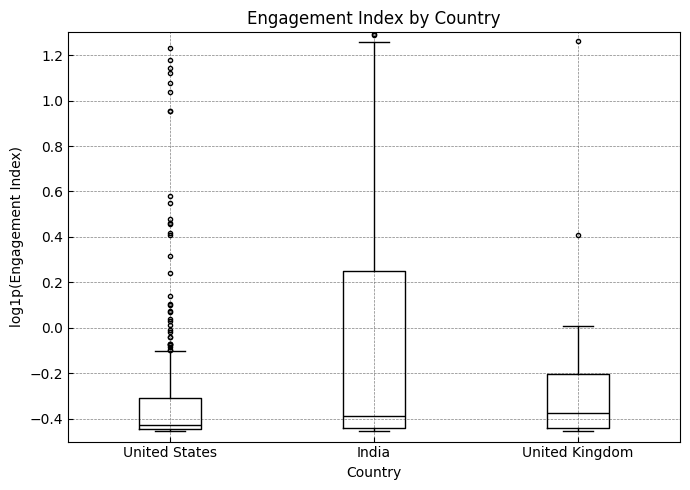

In [ ]:
# You can manually set the y-axis upper and lower limits here
y_lower = -0.5
y_upper = 1.3  # Adjust according to your data, e.g., 1.0 or 1.5
# ------- Country in a separate figure -------
df_local = df_cont[['country', target_col]].dropna()
group_counts = df_local['country'].value_counts()
valid_groups = group_counts[group_counts >= 30].index.tolist()
df_local = df_local[df_local['country'].isin(valid_groups)]

median_map = {
    g: df_local[df_local['country'] == g][target_col].median() for g in valid_groups
}
sorted_groups = sorted(valid_groups, key=lambda g: median_map[g])

labels = [country_map.get(g, g) for g in sorted_groups]
data = [df_local[df_local['country'] == g][target_col] for g in sorted_groups]

plt.figure(figsize=(7, 5))
plt.boxplot(data,
            labels=labels, patch_artist=False,
            boxprops=dict(color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='none', marker='o', color='black', markersize=3))
plt.ylim(y_lower, y_upper)  # Set y-axis range
plt.title('Engagement Index by Country')
plt.xlabel('Country')
plt.ylabel('log1p(Engagement Index)')
plt.tight_layout()
plt.show()


In [54]:
# Topic-to-keywords mapping
topic_keywords_dict = {
    "relational theory": [
        "relational theory", "relational theory relations", 
        "relational theory tuples", "relational theory attributes"
    ],
    "tuple relational calculus": ["tuple relational calculus"],
    "relational algebra": ["relational algebra"],
    "data visualization": ["data visualization"],
    "database optimization": [
        "database optimization", "database optimization indexing", 
        "database optimization query execution plans", "database optimization query optimization"
    ],
    "database scalability": [
        "database scalability", "database scalability replication", 
        "database scalability sharding"
    ],
    "NoSQL database management systems": ["NoSQL database management systems"],
    "logical and physical data independence": [
        "data independence", "logical data independence", 
        "physical data independence", "logical and physical data independence"
    ],
    "database management system components": ["database management system components"],
    "functions and stored procedures": ["functions and stored procedures"],
    "data modeling": [
        "data modeling", "data modeling conceptual modeling", 
        "data modeling mapping conceptual models to logical models", 
        "data modeling creating tables and columns"
    ],
    "database normalization": [
        "database normalization", "database normalization functional dependency", 
        "database normalization candidate", "database normalization super keys", 
        "database normalization normal forms up to BCNF", 
        "database normalization multivalued dependency", 
        "database normalization join dependency"
    ],
    "object-oriented data models": ["object-oriented data models"],
    "semi-structured traditional data models": ["semi-structured traditional data models"],
    "SQL": [
        "SQL", "SQL select", "SQL project", "SQL join", 
        "SQL insert", "SQL update", "SQL delete", "SQL aggregation", 
        "SQL group by", "SQL subqueries", "SQL common table expressions"
    ],
    "transaction processing": ["transaction processing"],
    "concurrency control and isolation levels": [
        "concurrency control", "isolation levels", 
        "concurrency control and isolation levels"
    ],
    "database back-ups and recovery": [
        "database back-ups", "database recovery", 
        "database back-ups and recovery"
    ],
    "distributed database management systems": ["distributed database management systems"],
    "data mining": [
        "data mining", "data mining algorithms", "data mining associative pattern", 
        "data mining sequential pattern", "data mining associative and sequential patterns", 
        "data mining data cleaning", "data mining market basket analysis"
    ],
    "data privacy and ethics": [
        "data privacy", "data ethics", "data privacy and ethics"
    ],
    "data security and database access management": [
        "data security", "database access management", 
        "data security and database access management"
    ],
    "data warehousing": ["data warehousing"]
}

In [55]:
len(topic_keywords_dict)

23

In [89]:
df_cont

,log1p_engagement_index,engagement_index,channel_productivity,num_tags,days_since_published,days_since_channel_created,title_word_count,valence,density,readability_fk_grade,log1p_duration_seconds,log1p_subscriber_count,log1p_channel_view_count,audio_language,textual_language,country
0,0.559053,0.749015,0.652305,38,1172,2646,18,0.000456,0.313621,6.1,6.775366,14.599413,20.208875,en,N/A,IN
1,-0.423579,-0.345301,0.599782,4,852,3673,10,0.036946,0.415558,11.0,5.749393,10.870490,17.335073,en,en,US
2,-0.447164,-0.360561,14.823398,1,3683,4043,3,0.025504,0.502818,13.5,5.924256,12.553206,18.680679,N/A,N/A,US
3,-0.445303,-0.359370,3.376263,3,5950,6235,8,0.024394,0.356620,8.8,8.151622,14.576317,19.946808,N/A,N/A,IN
4,-0.424055,-0.345612,0.114773,1,668,5158,5,0.040471,0.407346,11.4,5.153292,9.781376,13.837473,en,N/A,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,0.067978,0.070342,0.111962,18,755,1045,17,0.020349,0.367521,9.0,6.525030,12.785494,17.024320,en-IN,en-IN,IN
1035,-0.446811,-0.360335,0.075766,12,1407,1729,9,0.030405,0.391949,6.0,6.678342,8.213653,12.566882,ko,N/A,None
1036,-0.450896,-0.362943,0.074282,30,1427,1602,12,0.000000,0.250000,13.7,6.206576,7.926964,11.974576,en-IN,N/A,IN
1037,-0.447220,-0.360597,0.075766,17,1541,1729,11,0.055760,0.362989,6.8,5.910797,8.213653,12.566882,ko,N/A,None


C:\Users\Win10\AppData\Local\Temp\ipykernel_23156\2077993734.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,


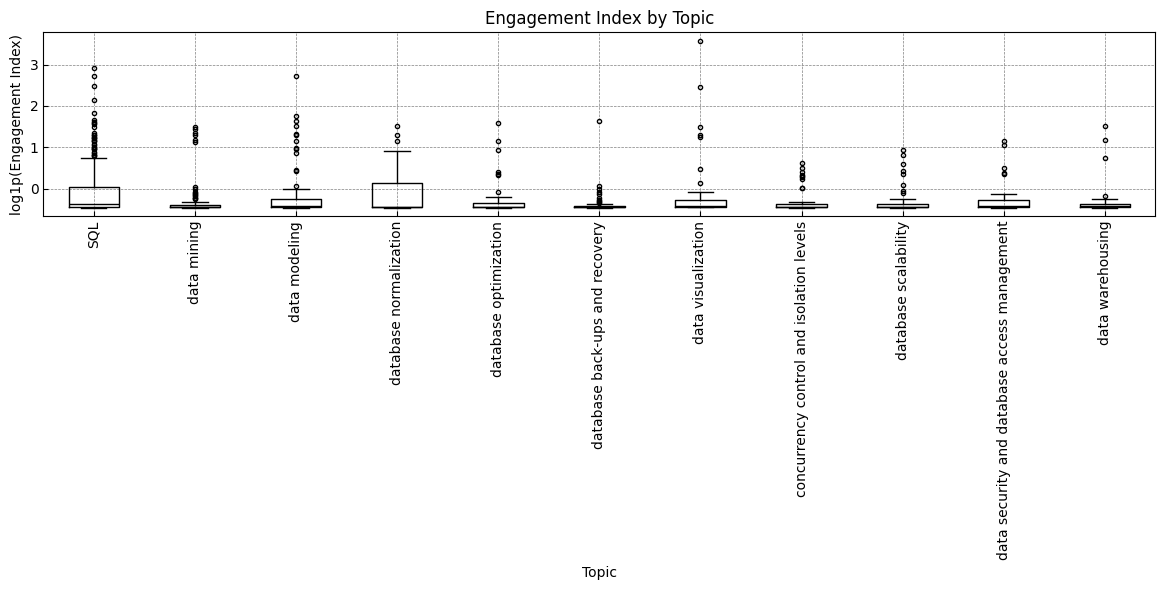

,topic,rho,p_value
0,SQL,0.182776,5.623351e-09
1,data mining,-0.050345,1.112362e-01
2,data modeling,0.037350,2.375147e-01
3,database normalization,0.049649,1.162728e-01
4,database optimization,-0.039904,2.069275e-01
5,database back-ups and recovery,-0.079953,1.134958e-02
6,data visualization,0.042721,1.766218e-01
7,concurrency control and isolation levels,-0.025875,4.132597e-01
8,database scalability,-0.021302,5.005962e-01
9,data security and database access management,-0.010433,7.415109e-01


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# ---------- Extract topic information ----------
def extract_topics(keywords_str, topic_dict):
    if pd.isna(keywords_str):
        return []
    keywords = [k.strip() for k in keywords_str.split(',')]
    matched_topics = set()
    for keyword in keywords:
        for topic, topic_keywords in topic_dict.items():
            if keyword in topic_keywords:
                matched_topics.add(topic)
    return list(matched_topics)

# Add topic information to df_cont
topic_col_data = df.loc[df_cont.index, 'keywords'].apply(lambda x: extract_topics(x, topic_keywords_dict))
df_cont = df_cont.copy()
df_cont['topics'] = topic_col_data

# ---------- Expand to one row per topic ----------
df_topic_exploded = df_cont.explode('topics').dropna(subset=['topics'])

# ---------- Draw boxplot ----------
valid_topics = df_topic_exploded['topics'].value_counts()
valid_topics = valid_topics[valid_topics >= 30].index.tolist()

plt.figure(figsize=(12, 6))
data = [df_topic_exploded[df_topic_exploded['topics'] == t]['log1p_engagement_index'] for t in valid_topics]
plt.boxplot(data,
            labels=valid_topics,
            patch_artist=False,
            boxprops=dict(color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='none', marker='o', color='black', markersize=3))
plt.xticks(rotation=90)
plt.xlabel('Topic')
plt.ylabel('log1p(Engagement Index)')
plt.title('Engagement Index by Topic')
plt.tight_layout()
plt.show()

# ---------- Correlation Test ----------
# Create binary variable for each topic
topic_corr_results = []
for topic in valid_topics:
    df_cont[f'topic_{topic}'] = df_cont['topics'].apply(lambda x: topic in x if isinstance(x, list) else False)
    rho, pval = pointbiserialr(df_cont[f'topic_{topic}'], df_cont['log1p_engagement_index'])
    topic_corr_results.append({'topic': topic, 'rho': rho, 'p_value': pval})

topic_corr_df = pd.DataFrame(topic_corr_results)
display(topic_corr_df)


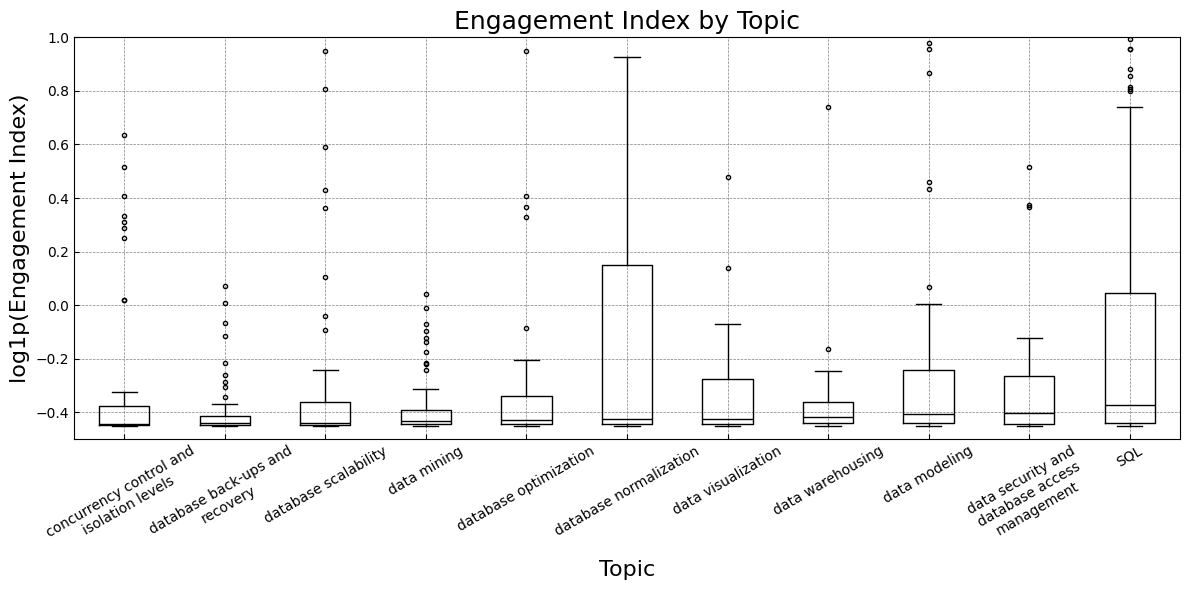

In [ ]:
import textwrap
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Calculate the median for each topic
median_map = {
    t: df_topic_exploded[df_topic_exploded['topics'] == t]['log1p_engagement_index'].median()
    for t in valid_topics
}

# Sort topics by median from low to high
sorted_topics = sorted(valid_topics, key=lambda t: median_map[t])

# Prepare data (after sorting)
data = [df_topic_exploded[df_topic_exploded['topics'] == t]['log1p_engagement_index'] for t in sorted_topics]

# Wrap labels (line break)
max_width = 25
wrapped_labels = ['\n'.join(textwrap.wrap(label, max_width)) for label in sorted_topics]

# Manually set y-axis range
y_lower = -0.5
y_upper = 1.0  # You can adjust this value, e.g., 1.5 or 2.0

# Draw boxplot
box = plt.boxplot(
    data,
    patch_artist=False,
    boxprops=dict(color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(markerfacecolor='none', marker='o', color='black', markersize=3)
)

plt.xticks(
    ticks=range(1, len(sorted_topics) + 1),
    labels=wrapped_labels,
    rotation=30,
    ha='center',
    fontsize=10
)

plt.ylim(y_lower, y_upper)

plt.xlabel('Topic', fontsize=16)
plt.ylabel('log1p(Engagement Index)', fontsize=16)
plt.title('Engagement Index by Topic', fontsize=18)
plt.tight_layout()
plt.show()


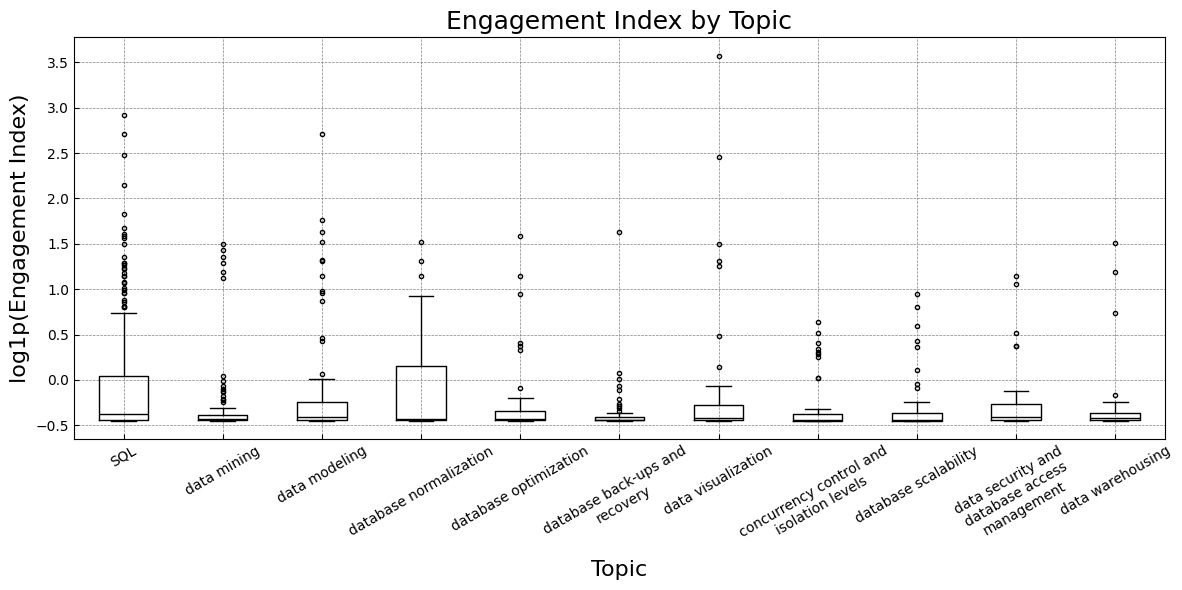

In [57]:
import textwrap

plt.figure(figsize=(12, 6))
data = [df_topic_exploded[df_topic_exploded['topics'] == t]['log1p_engagement_index'] for t in valid_topics]
box = plt.boxplot(
    data,
    patch_artist=False,
    boxprops=dict(color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(markerfacecolor='none', marker='o', color='black', markersize=3)
)

max_width = 25
wrapped_labels = ['\n'.join(textwrap.wrap(label, max_width)) for label in valid_topics]

plt.xticks(
    ticks=range(1, len(valid_topics) + 1),
    labels=wrapped_labels,
    rotation=30,
    ha='center',
    fontsize=10
)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('log1p(Engagement Index)', fontsize=16)
plt.title('Engagement Index by Topic', fontsize=18)
plt.tight_layout()
plt.show()


# OLS Modeling

In [95]:
df_cont.columns

Index(['log1p_engagement_index', 'engagement_index', 'channel_productivity',
       'num_tags', 'days_since_published', 'days_since_channel_created',
       'title_word_count', 'valence', 'density', 'readability_fk_grade',
       'log1p_duration_seconds', 'log1p_subscriber_count',
       'log1p_channel_view_count', 'audio_language', 'textual_language',
       'country', 'topics', 'topic_SQL', 'topic_data mining',
       'topic_data modeling', 'topic_database normalization',
       'topic_database optimization', 'topic_database back-ups and recovery',
       'topic_data visualization',
       'topic_concurrency control and isolation levels',
       'topic_database scalability',
       'topic_data security and database access management',
       'topic_data warehousing'],
      dtype='object')

In [ ]:
df_model = df_cont.copy()

# Merge rare categories in categorical variables
def merge_rare_categories(df, col, min_count=30):
    counts = df[col].value_counts()
    valid = counts[counts >= min_count].index
    return df[col].apply(lambda x: x if x in valid else 'Other')


In [97]:
df_model['audio_language_grouped'] = merge_rare_categories(df_model, 'audio_language', min_count=30)
df_model['textual_language_grouped'] = merge_rare_categories(df_model, 'textual_language', min_count=30)
df_model['country_grouped'] = merge_rare_categories(df_model, 'country', min_count=30)


In [ ]:
df_model = pd.get_dummies(df_model, 
                          columns=['audio_language_grouped', 'textual_language_grouped', 'country_grouped'], 
                          prefix=['audio', 'text', 'country'], 
                          drop_first=True)  # Avoid dummy variable trap


In [99]:
df_model.columns

Index(['log1p_engagement_index', 'engagement_index', 'channel_productivity',
       'num_tags', 'days_since_published', 'days_since_channel_created',
       'title_word_count', 'valence', 'density', 'readability_fk_grade',
       'log1p_duration_seconds', 'log1p_subscriber_count',
       'log1p_channel_view_count', 'audio_language', 'textual_language',
       'country', 'topics', 'topic_SQL', 'topic_data mining',
       'topic_data modeling', 'topic_database normalization',
       'topic_database optimization', 'topic_database back-ups and recovery',
       'topic_data visualization',
       'topic_concurrency control and isolation levels',
       'topic_database scalability',
       'topic_data security and database access management',
       'topic_data warehousing', 'audio_Other', 'audio_en', 'audio_en-GB',
       'audio_en-IN', 'audio_en-US', 'audio_hi', 'text_Other', 'text_en',
       'text_en-IN', 'country_IN', 'country_Other', 'country_US'],
      dtype='object')

In [ ]:
# All interval variables
interval_vars = [
    'log1p_duration_seconds', 'log1p_subscriber_count', 'log1p_channel_view_count', 'channel_productivity', 'num_tags',
    'days_since_published', 'days_since_channel_created',
    'title_word_count', 'valence', 'density', 'readability_fk_grade'
]

# SQL topic
topic_vars = ['topic_SQL']

# Dummy-coded columns
dummy_vars = [col for col in df_model.columns if (
    col.startswith('audio_') or col.startswith('text_') or col.startswith('country_'))]

# Combine all features
final_features = interval_vars + topic_vars + dummy_vars


In [101]:
X = df_model[final_features]
y = df_model['log1p_engagement_index']


In [102]:
print(X.shape)
print(y.shape)


(1002, 25)
(1002,)


In [ ]:
import statsmodels.api as sm

# Add intercept
X_with_const = sm.add_constant(X)

# Remove non-numeric columns (audio_language is the original categorical column, already replaced by dummy coding)
X_with_const = X_with_const.drop(columns=['audio_language'])

# Convert to float
X_with_const = X_with_const.astype(float)

# Fit OLS
model = sm.OLS(y, X_with_const).fit()

# Output summary
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     log1p_engagement_index   R-squared:                       0.351
Model:                                OLS   Adj. R-squared:                  0.335
Method:                     Least Squares   F-statistic:                     22.01
Date:                    Sun, 29 Jun 2025   Prob (F-statistic):           2.28e-75
Time:                            23:43:16   Log-Likelihood:                -467.35
No. Observations:                    1002   AIC:                             984.7
Df Residuals:                         977   BIC:                             1107.
Df Model:                              24                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF check
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]
print(vif_data)


                       feature         VIF
0                        const  226.031134
1       log1p_duration_seconds    1.216877
2       log1p_subscriber_count   20.142364
3     log1p_channel_view_count   21.366990
4         channel_productivity    1.460711
5                     num_tags    1.381790
6         days_since_published    1.927123
7   days_since_channel_created    1.787873
8             title_word_count    1.394989
9                      valence    1.081033
10                     density    1.368467
11        readability_fk_grade    1.370856
12                   topic_SQL    1.333323
13                 audio_Other    2.595995
14                    audio_en    4.296029
15                 audio_en-GB    1.571554
16                 audio_en-IN    3.144120
17                 audio_en-US    2.239123
18                    audio_hi    1.610043
19                  text_Other    1.252861
20                     text_en    1.243330
21                  text_en-IN    2.380444
22         

In [ ]:
# All interval variables
interval_vars = [
    'duration_seconds', 'subscriber_count', 'channel_productivity', 'num_tags',
    'channel_view_count', 'days_since_published', 'days_since_channel_created',
    'title_word_count', 'valence', 'density', 'readability_fk_grade'
]

# SQL topic
topic_vars = ['topic_SQL']

# Dummy-coded columns
dummy_vars = [col for col in df_model.columns if (
    col.startswith('audio_') or col.startswith('text_'))]

# Combine all features
final_features = interval_vars + topic_vars + dummy_vars


In [ ]:
import statsmodels.api as sm

# Remove non-numeric columns (country_* are original categorical columns, already replaced by dummy coding and not needed)
X_with_const = X_with_const.drop(columns=['country_IN', 'country_Other', 'country_US'])

# Convert to float
X_with_const = X_with_const.astype(float)

# Fit OLS
model = sm.OLS(y, X_with_const).fit()

# Output summary
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     log1p_engagement_index   R-squared:                       0.347
Model:                                OLS   Adj. R-squared:                  0.333
Method:                     Least Squares   F-statistic:                     24.75
Date:                    Sun, 29 Jun 2025   Prob (F-statistic):           4.37e-76
Time:                            05:14:30   Log-Likelihood:                -470.70
No. Observations:                    1002   AIC:                             985.4
Df Residuals:                         980   BIC:                             1093.
Df Model:                              21                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF check
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]
print(vif_data)


                       feature        VIF
0                        const  83.733809
1             duration_seconds   1.255378
2             subscriber_count   2.953273
3         channel_productivity   1.228928
4                     num_tags   1.342240
5           channel_view_count   2.897406
6         days_since_published   1.847931
7   days_since_channel_created   1.448685
8             title_word_count   1.365751
9                      valence   1.082027
10                     density   1.329241
11        readability_fk_grade   1.350423
12                   topic_SQL   1.304275
13                 audio_Other   2.521223
14                    audio_en   4.155731
15                 audio_en-GB   1.472845
16                 audio_en-IN   3.046827
17                 audio_en-US   2.137835
18                    audio_hi   1.574995
19                  text_Other   1.192320
20                     text_en   1.277529
21                  text_en-IN   2.349143
